In [1]:
# Import libraries for data manipulation

import numpy as np
import pandas as pd

# Import libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing plotly

import plotly.express as px
!pip install plotly

# Principal Component Analysis & Zscore Libraries

from sklearn.decomposition import PCA
from scipy.stats import zscore

# Checking significance & the sample size adequacy

!pip install factor_analyzer 

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Part 1

## 1 Probelm Definition and EDA

### 1.1 Probelm Definition

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

### Loading Data

In [2]:
df=pd.read_excel('Clustering_Clean_Ads_Data.xlsx')

In [3]:
# Checking the data whether loaded properly using the head function

In [4]:
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [5]:
# Making a copy of the original data
df_copy=df.copy()

### 1.2 Check shape

In [6]:
df.shape

(23066, 19)

In [8]:
# The dataset has 23,066 rows and 19 columns

### 1.3 Data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [10]:
# The dataset has  1  - Date time variable
                 # 5  - Categorical variables
                 # 13 - Numerical variables
# Excpet CTR, CPM & CPC varaibales all the other variables does not have null values.         

### 1.4 Statistical Summary

In [11]:
df.describe().T.round(2)

count        mean         std       min       25%  \
Ad - Length            23066.0      385.16      233.65    120.00    120.00   
Ad- Width              23066.0      337.90      203.09     70.00    250.00   
Ad Size                23066.0    96674.47    61538.33  33600.00  72000.00   
Available_Impressions  23066.0  2432043.67  4742887.76      1.00  33672.25   
Matched_Queries        23066.0  1295099.14  2512969.86      1.00  18282.50   
Impressions            23066.0  1241519.52  2429399.96      1.00   7990.50   
Clicks                 23066.0    10678.52    17353.41      1.00    710.00   
Spend                  23066.0     2706.63     4067.93      0.00     85.18   
Fee                    23066.0        0.34        0.03      0.21      0.33   
Revenue                23066.0     1924.25     3105.24      0.00     55.37   
CTR                    18330.0        0.07        0.08      0.00      0.00   
CPM                    18330.0        7.67        6.48      0.00      1.71   
CPC                    18330.0        0.35        0.34      0.00      0.09   

                             50%         75%          max  
Ad - Length               300.00      720.00       728.00  
Ad- Width                 300.00      600.00       600.00  
Ad Size                 72000.00    84000.00    216000.00  
Available_Impressions  483771.00  2527711.75  27592861.00  
Matched_Queries        258087.50  1180700.00  14702025.00  
Impressions            225290.00  1112428.50  14194774.00  
Clicks                   4425.00    12793.75    143049.00  
Spend                    1425.12     3121.40     26931.87  
Fee                         0.35        0.35         0.35  
Revenue                   926.34     2091.34     21276.18  
CTR                         0.08        0.13         1.00  
CPM                         7.66       12.51        81.56  
CPC                         0.16        0.57         7.26

In [12]:
# Ad Size has 25% & 50% are same 
# Available Imperssions , Matched Queries, Impressions & Clicks have min value as 1
# Available Imperssions , Matched Queries, Impressions has higher standard deviation values
# All the numerical variables are at the different scale of measures

In [13]:
df.describe(include='object').T.round(2)

count unique            top   freq
Timestamp      23066   2018  2020-11-13-22     13
InventoryType  23066      7        Format4   7165
Ad Type        23066     14       Inter224   1658
Platform       23066      3          Video   9873
Device Type    23066      2         Mobile  14806
Format         23066      2          Video  11552

In [14]:
# Ad Type has 14 types which the highest with Inter224 types as the highest no. of ad types
# There are only 3 platforms 
# Mobile type is the highest usage among devices 

In [15]:
# classifiying the numerical and categorical variables and storing in a new variable / list 

In [16]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [17]:
list_df_num=list(df_num.columns)
list_df_num

['Ad - Length',
 'Ad- Width',
 'Ad Size',
 'Available_Impressions',
 'Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

In [18]:
# Dropping the timestamp variable as it does not required

In [19]:
df_cat=df.select_dtypes(include=['object'])
df_cat=df_cat.drop('Timestamp',axis=1)
df_cat.head()

InventoryType   Ad Type Platform Device Type   Format
0       Format1  Inter222    Video     Desktop  Display
1       Format1  Inter227      App      Mobile    Video
2       Format1  Inter222    Video     Desktop  Display
3       Format1  Inter228    Video      Mobile    Video
4       Format1  Inter217      Web     Desktop    Video

In [20]:
list_df_cat=list(df_cat.columns)
list_df_cat

['InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

### 1.5 Univariate Analysis

### 1.5.1 Univariate Analysis - Numerical 

In [21]:
def univariateAnalysis_numeric (column, nbins) :
    print ("Description of " +  column)
    print("---------")
    print(df[column].describe().round(2), end=' ')
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (8,4))
          
    ax=sns.histplot(df[column], bins=nbins, edgecolor='Black', lw=2,ax=axs[0],kde=True)
    axs[0].set_title("Distribution of " + column)
          
    for container in axs[0].containers:
        axs[0].bar_label (container, label_type="edge", fontsize=10)

    sns.boxplot (x=df[column], ax=axs[1]) 
    axs[1].set_title("Boxplot of " + column)
    
    plt.tight_layout() 
    plt.show()

Description of Ad - Length
---------
count    23066.00
mean       385.16
std        233.65
min        120.00
25%        120.00
50%        300.00
75%        720.00
max        728.00
Name: Ad - Length, dtype: float64 

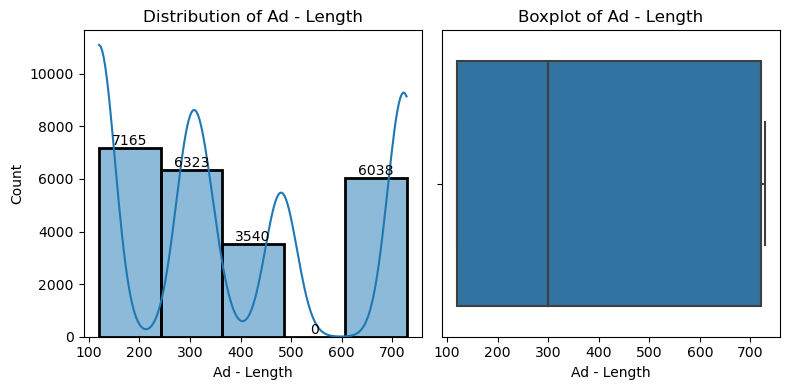

Description of Ad- Width
---------
count    23066.00
mean       337.90
std        203.09
min         70.00
25%        250.00
50%        300.00
75%        600.00
max        600.00
Name: Ad- Width, dtype: float64 

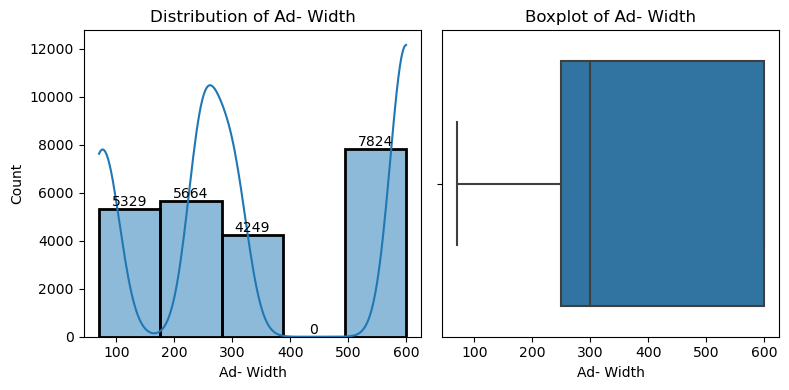

Description of Ad Size
---------
count     23066.00
mean      96674.47
std       61538.33
min       33600.00
25%       72000.00
50%       72000.00
75%       84000.00
max      216000.00
Name: Ad Size, dtype: float64 

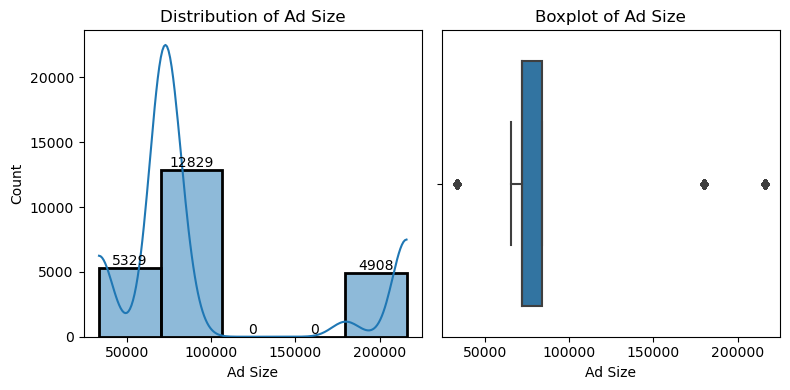

Description of Available_Impressions
---------
count       23066.00
mean      2432043.67
std       4742887.76
min             1.00
25%         33672.25
50%        483771.00
75%       2527711.75
max      27592861.00
Name: Available_Impressions, dtype: float64 

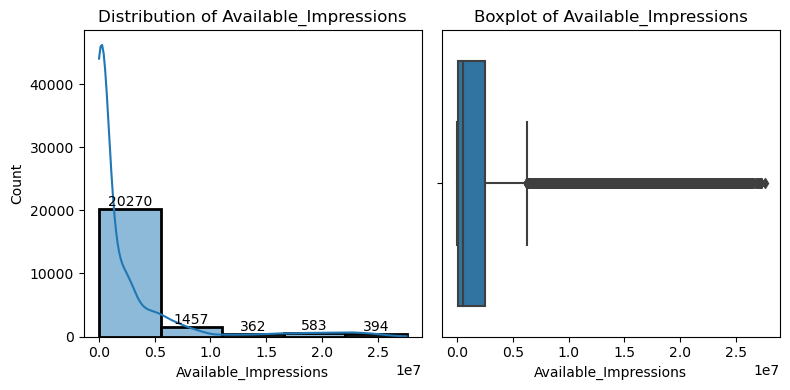

Description of Matched_Queries
---------
count       23066.00
mean      1295099.14
std       2512969.86
min             1.00
25%         18282.50
50%        258087.50
75%       1180700.00
max      14702025.00
Name: Matched_Queries, dtype: float64 

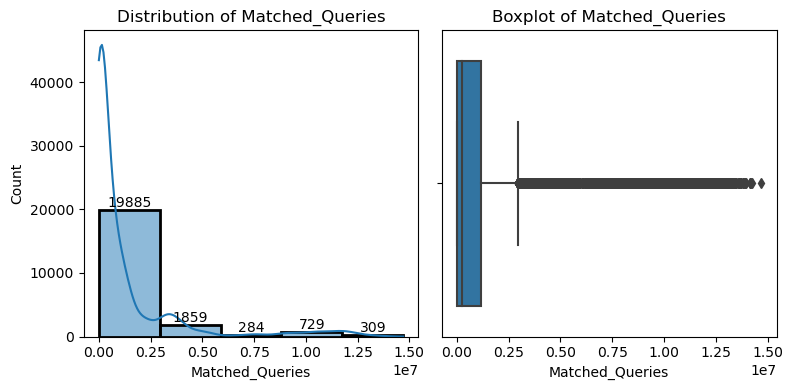

Description of Impressions
---------
count       23066.00
mean      1241519.52
std       2429399.96
min             1.00
25%          7990.50
50%        225290.00
75%       1112428.50
max      14194774.00
Name: Impressions, dtype: float64 

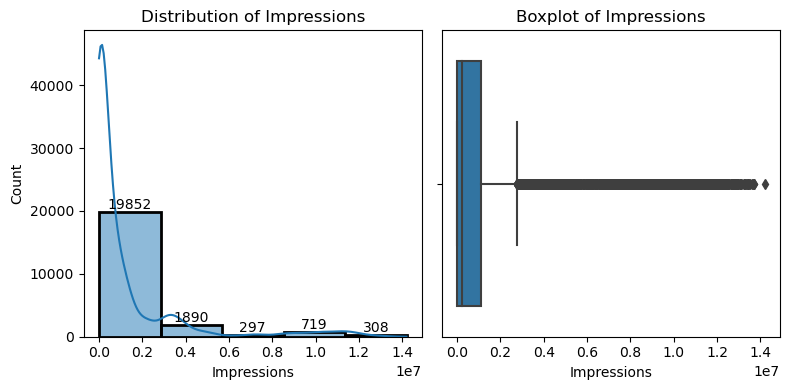

Description of Clicks
---------
count     23066.00
mean      10678.52
std       17353.41
min           1.00
25%         710.00
50%        4425.00
75%       12793.75
max      143049.00
Name: Clicks, dtype: float64 

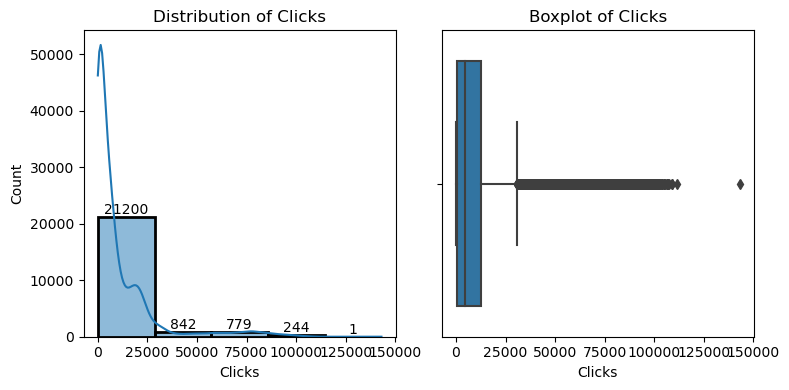

Description of Spend
---------
count    23066.00
mean      2706.63
std       4067.93
min          0.00
25%         85.18
50%       1425.12
75%       3121.40
max      26931.87
Name: Spend, dtype: float64 

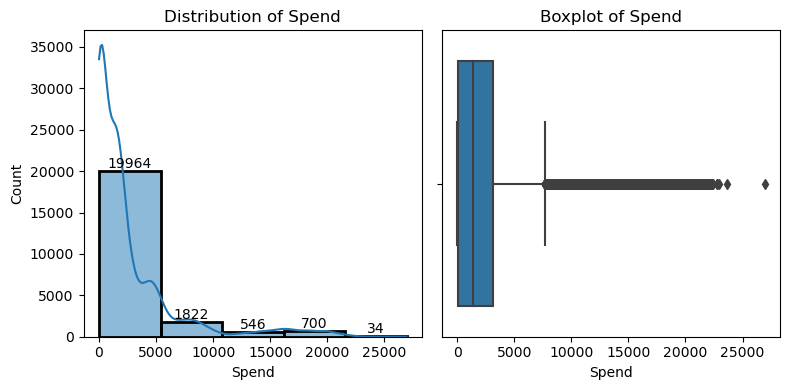

Description of Fee
---------
count    23066.00
mean         0.34
std          0.03
min          0.21
25%          0.33
50%          0.35
75%          0.35
max          0.35
Name: Fee, dtype: float64 

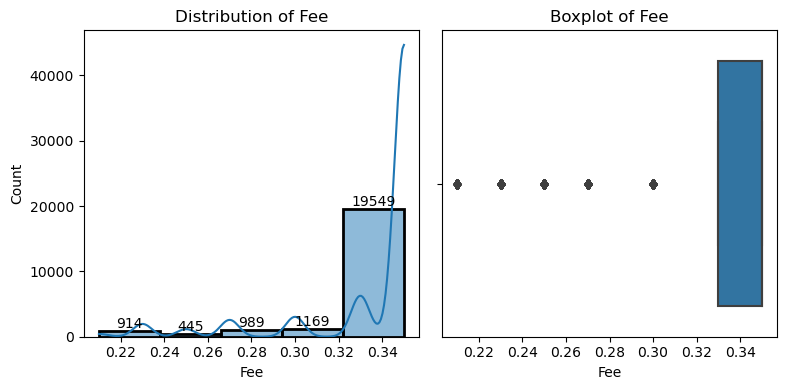

Description of Revenue
---------
count    23066.00
mean      1924.25
std       3105.24
min          0.00
25%         55.37
50%        926.34
75%       2091.34
max      21276.18
Name: Revenue, dtype: float64 

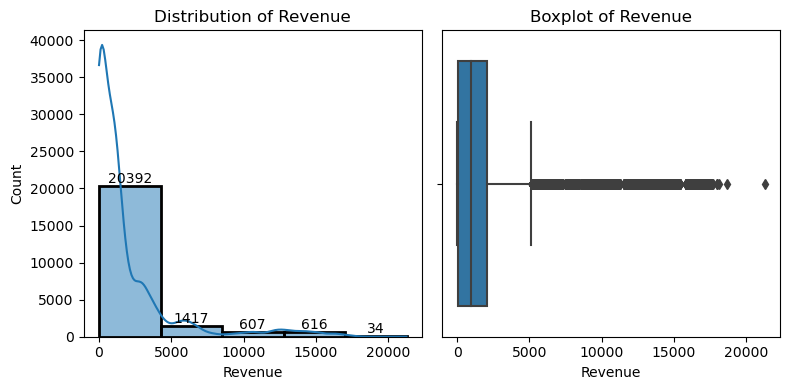

Description of CTR
---------
count    18330.00
mean         0.07
std          0.08
min          0.00
25%          0.00
50%          0.08
75%          0.13
max          1.00
Name: CTR, dtype: float64 

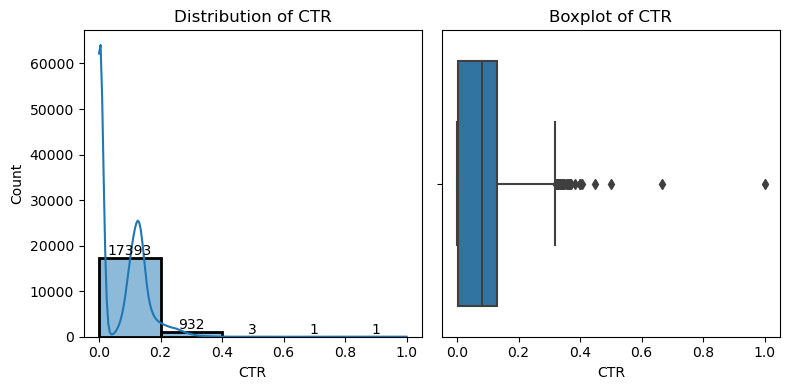

Description of CPM
---------
count    18330.00
mean         7.67
std          6.48
min          0.00
25%          1.71
50%          7.66
75%         12.51
max         81.56
Name: CPM, dtype: float64 

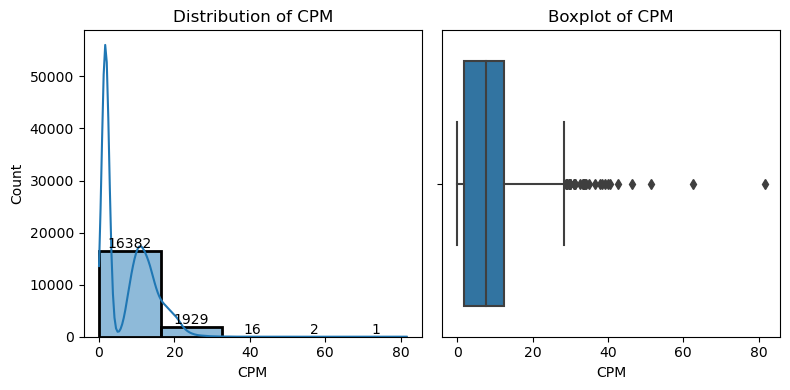

Description of CPC
---------
count    18330.00
mean         0.35
std          0.34
min          0.00
25%          0.09
50%          0.16
75%          0.57
max          7.26
Name: CPC, dtype: float64 

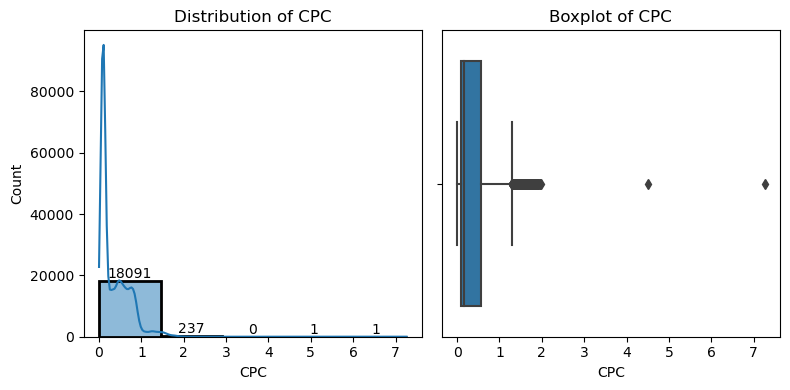

In [23]:
for i in list_df_num:
    univariateAnalysis_numeric(i,5)

In [24]:
# Ad - Size: The distribution is right skewed. Does not have UL since the difference between the 75% and the max value is huge
# Available - Impressions: Right Skewed as mean>median. Having too many outliers
# Clicks: The distribution is right skewed. The Std is high uggests that the clicks of the ads vary notably around the mean.
# Spend: 75% of the spend was around 3K but the max is high as 27K
# Revenue: There are Ads with 0 revenue. The distribution is left skewed as the mean<median

### 1.5.2  Univariate Analysis - Categorical

In [26]:
def univariateAnalysis_categorical(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(include='object'),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=sns.countplot(df[column], x=df_cat[column],order=df_cat[column].value_counts().index);
    plt.bar_label(a.containers[0]);
    plt.show()

Description of InventoryType
----------------------------------------------------------------------------
count       23066
unique          7
top       Format4
freq         7165
Name: InventoryType, dtype: object Distribution of InventoryType
----------------------------------------------------------------------------


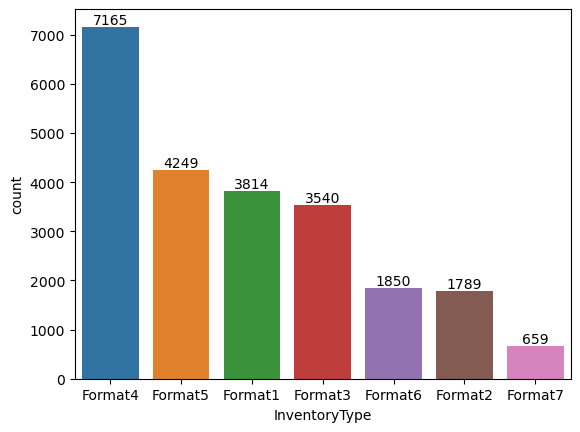

Description of Ad Type
----------------------------------------------------------------------------
count        23066
unique          14
top       Inter224
freq          1658
Name: Ad Type, dtype: object Distribution of Ad Type
----------------------------------------------------------------------------


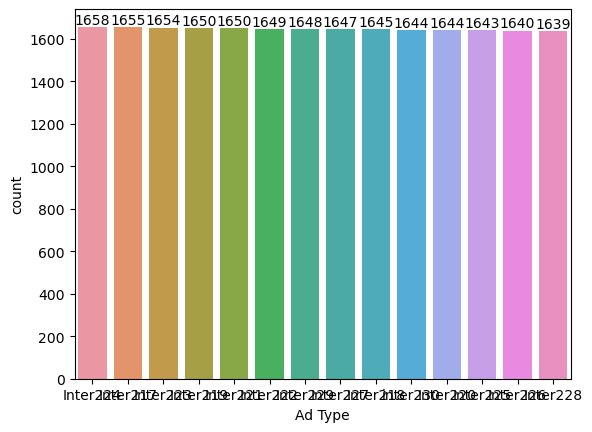

Description of Platform
----------------------------------------------------------------------------
count     23066
unique        3
top       Video
freq       9873
Name: Platform, dtype: object Distribution of Platform
----------------------------------------------------------------------------


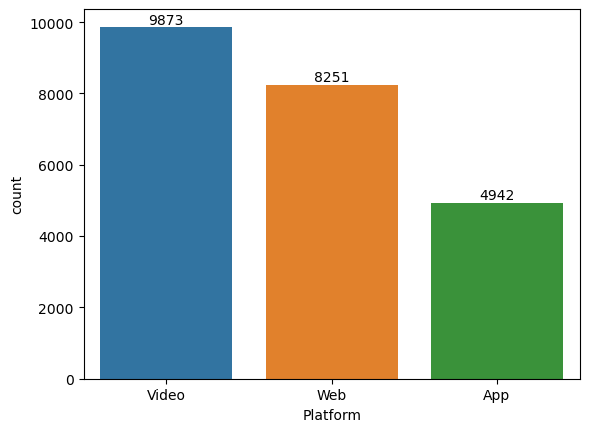

Description of Device Type
----------------------------------------------------------------------------
count      23066
unique         2
top       Mobile
freq       14806
Name: Device Type, dtype: object Distribution of Device Type
----------------------------------------------------------------------------


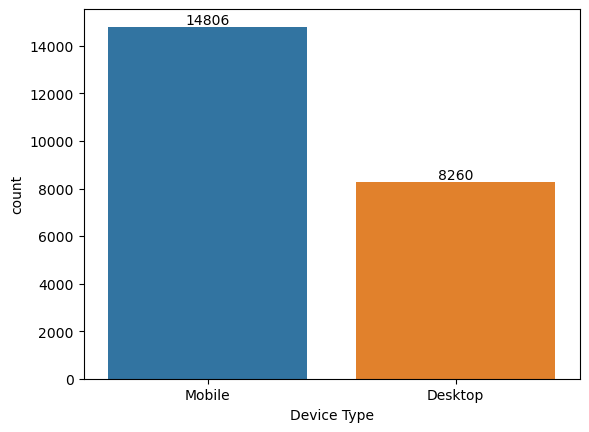

Description of Format
----------------------------------------------------------------------------
count     23066
unique        2
top       Video
freq      11552
Name: Format, dtype: object Distribution of Format
----------------------------------------------------------------------------


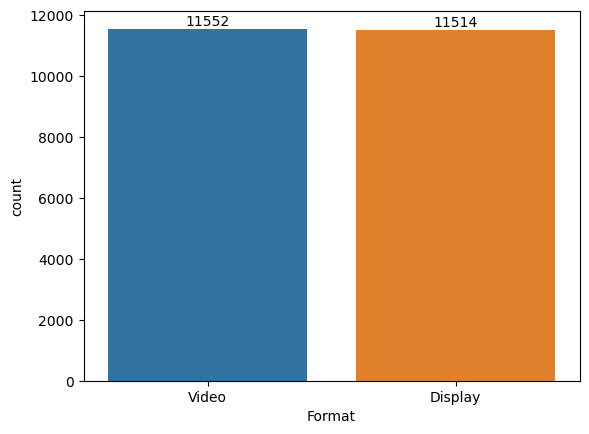

In [27]:
for i in list_df_cat:
    univariateAnalysis_categorical(i);

In [ ]:
# Inventory Type: Format 4 i shaving the higher count while format 7 with the lowest count
# Ad Type: Almost all the types are same in count
# Platform: Video platform contributes to the highest count
# Device Type: Obviously mobile device has higher contribution

### 1.6 Bivariate Analysis

<Figure size 600x300 with 0 Axes>

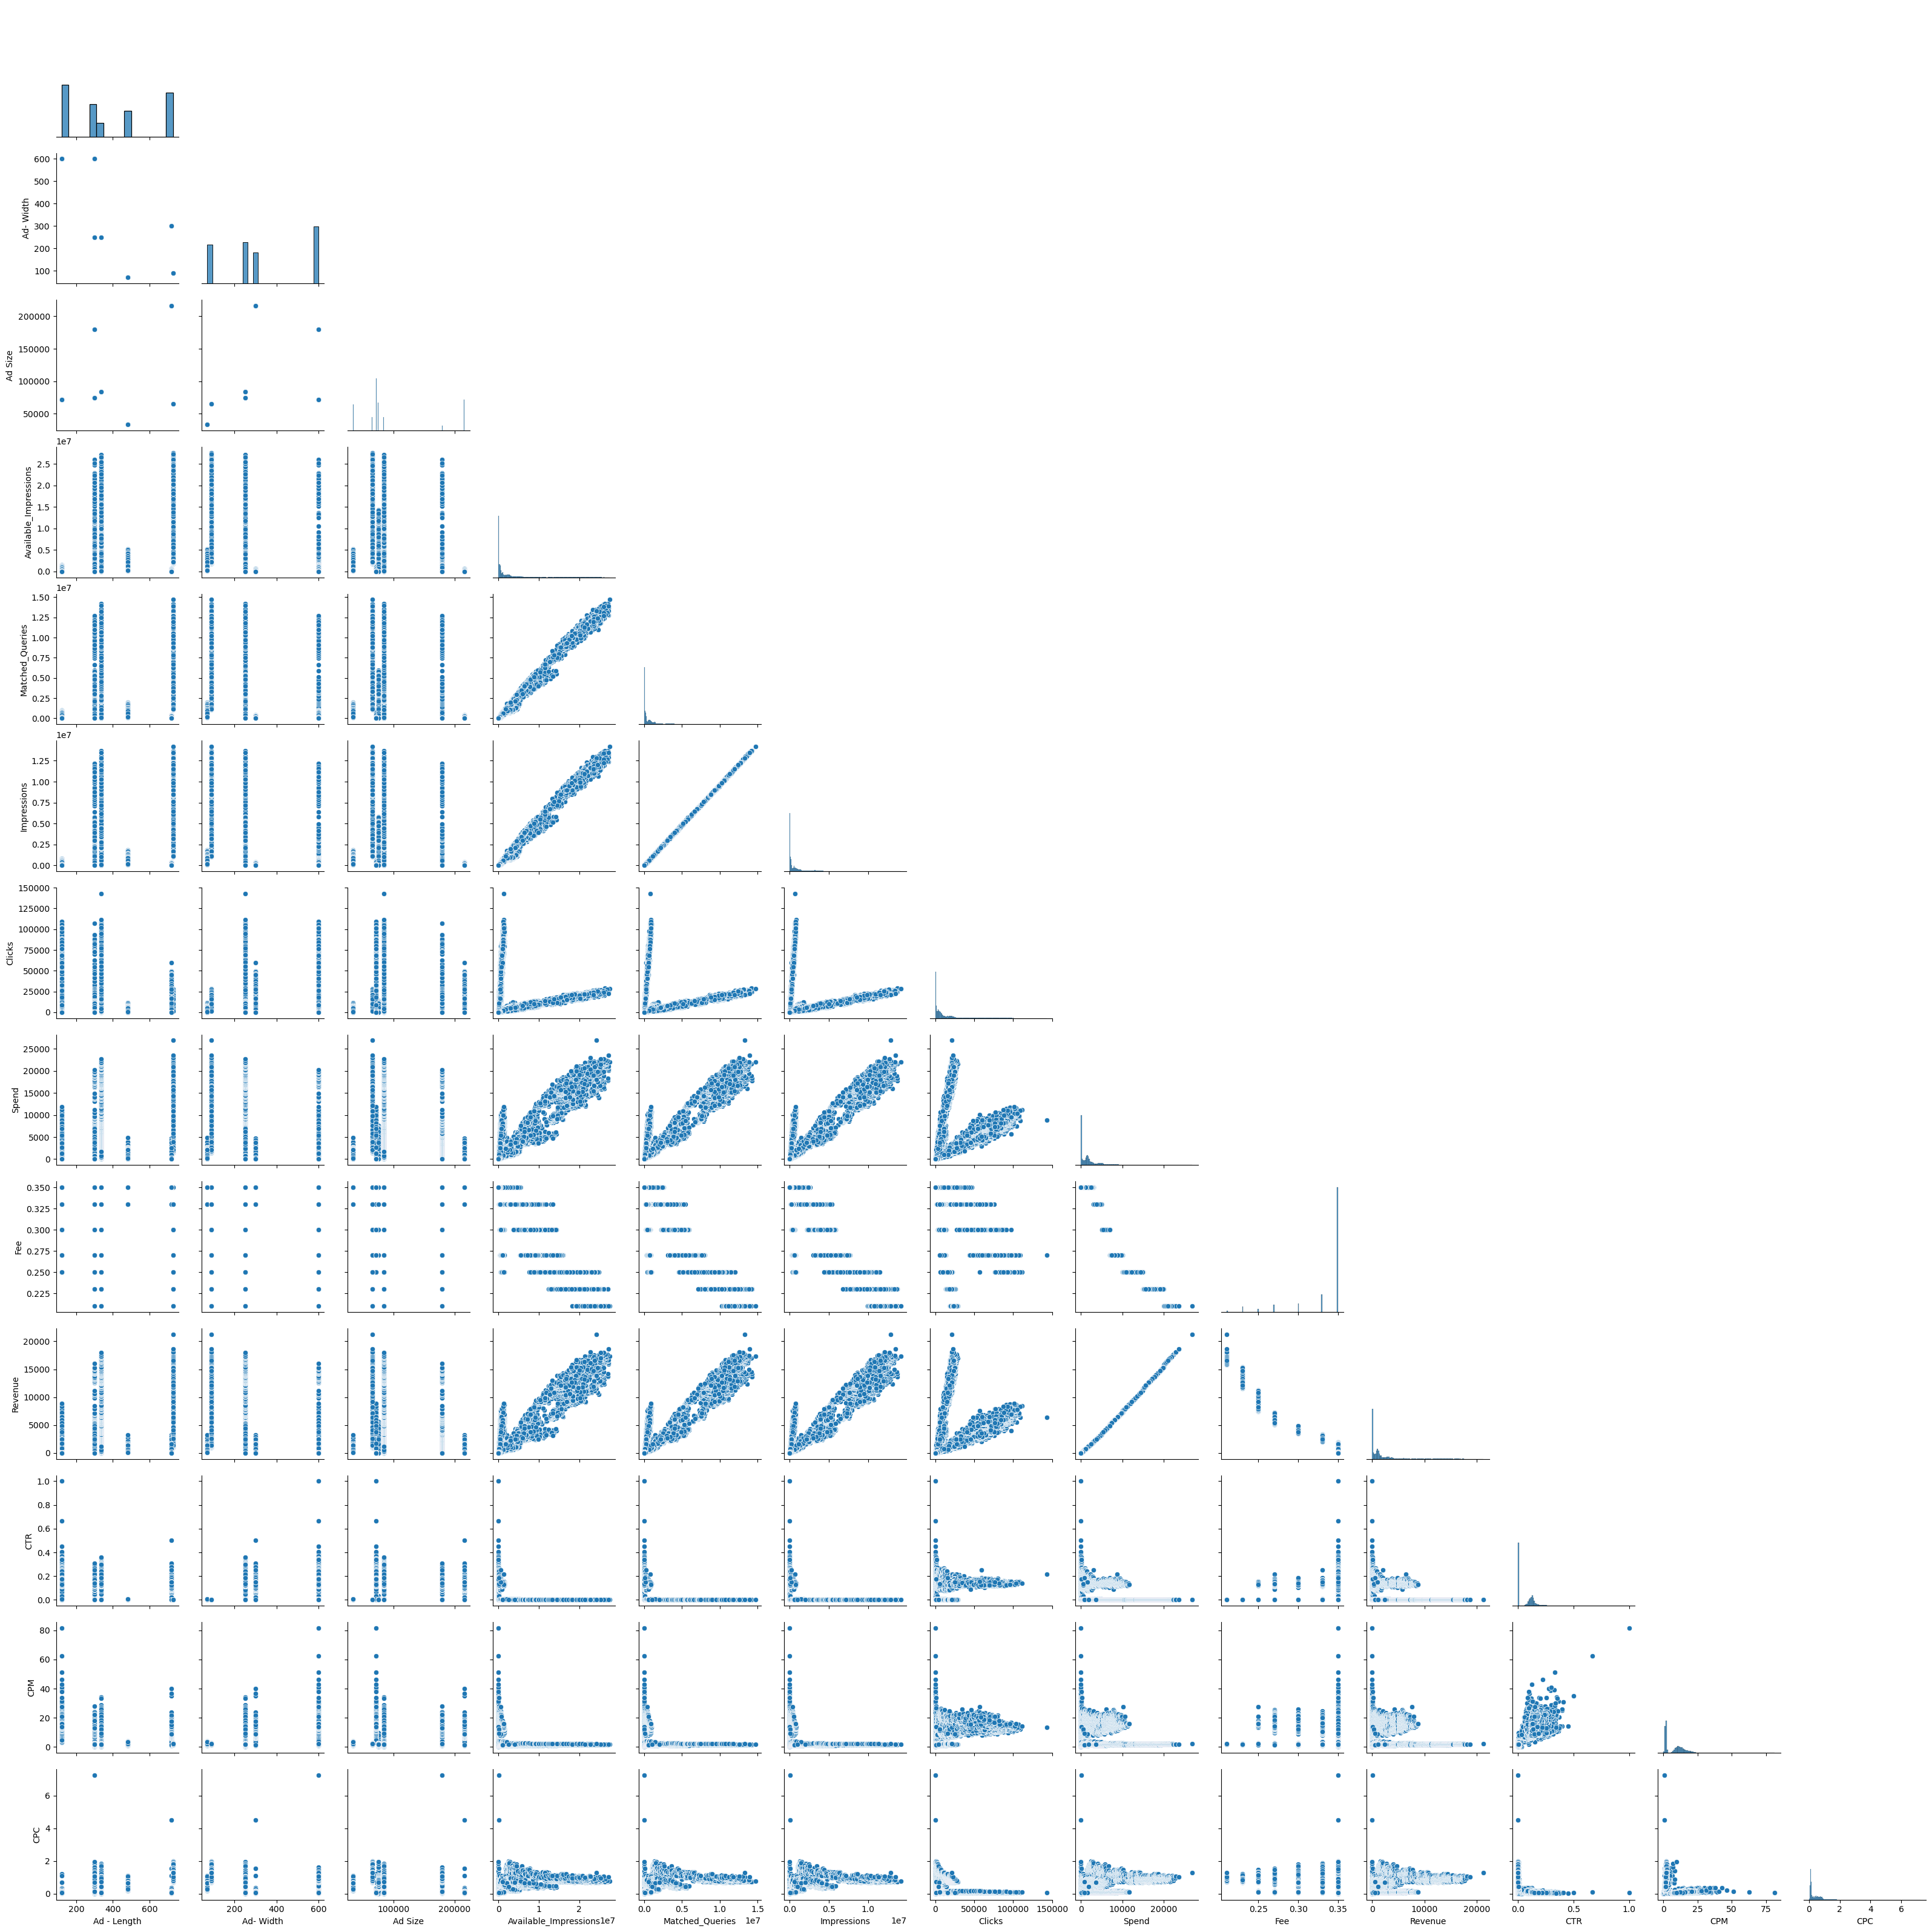

In [28]:
plt.figure(figsize=(6,3))
sns.pairplot(data=df,vars=list_df_num,corner=True);

In [ ]:
# Available_ Impression has positive correlation with Revenue, Spend, Matched Queries, Imperssions

### 1.7 Missing Value Treatment

In [30]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [31]:
# CTR, CPM & CPC have missing values.

In [32]:
df.duplicated().sum()

0

In [ ]:
# No Duplicate rows/values found

In [35]:
# Replacing all the null values with NaN

In [33]:
df.replace('',np.NaN,inplace=True)

In [34]:
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

### 1.8 Treat missing values in CPC, CTR and CPM using the formula given

In [36]:
# Filling the CTR columns missing value using the formula CTR = (Clicks/Impressions)*100

In [37]:
df['CTR']=df['CTR'].fillna(df['Clicks']/df['Impressions']*100)
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue    CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  100.0  NaN  NaN  
23062            2       1   0.04  0.35   0.0260   50.0  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  100.0  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  100.0  NaN  NaN  
23065            2       1   0.09  0.35   0.0585   50.0  NaN  NaN

In [38]:
# Filling the CPM columns missing value using the formula CPM = (Spend/Impressions)*1000

In [39]:
df['CPM']=df['CPM'].fillna(df['Spend']/df['Impressions']*1000)
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue    CTR   CPM  CPC  
23061            1       1   0.07  0.35   0.0455  100.0  70.0  NaN  
23062            2       1   0.04  0.35   0.0260   50.0  20.0  NaN  
23063            1       1   0.05  0.35   0.0325  100.0  50.0  NaN  
23064            1       1   0.07  0.35   0.0455  100.0  70.0  NaN  
23065            2       1   0.09  0.35   0.0585   50.0  45.0  NaN

In [40]:
# Filling the CPC columns missing value using the formula CPC = Spend/Clicks 

In [41]:
df['CPC']=df['CPC'].fillna(df['Spend']/df['Clicks'])
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue    CTR   CPM   CPC  
23061            1       1   0.07  0.35   0.0455  100.0  70.0  0.07  
23062            2       1   0.04  0.35   0.0260   50.0  20.0  0.04  
23063            1       1   0.05  0.35   0.0325  100.0  50.0  0.05  
23064            1       1   0.07  0.35   0.0455  100.0  70.0  0.07  
23065            2       1   0.09  0.35   0.0585   50.0  45.0  0.09

In [42]:
df1_copy=df.copy()

In [115]:
df2_copy=df.copy()

In [116]:
df2_copy

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue       CTR   CPM   CPC  
0              323       1   0.00  0.35   0.0000    0.0031   0.0  0.00  
1              285       1   0.00  0.35   0.0000    0.0035   0.0  0.00  
2              355       1   0.00  0.35   0.0000    0.0028   0.0  0.00  
3              495       1   0.00  0.35   0.0000    0.0020   0.0  0.00  
4              242       1   0.00  0.35   0.0000    0.0041   0.0  0.00  
...            ...     ...    ...   ...      ...       ...   ...   ...  
23061            1       1   0.07  0.35   0.0455  100.0000  70.0  0.07  
23062            2       1   0.04  0.35   0.0260   50.0000  20.0  0.04  
23063            1       1   0.05  0.35   0.0325  100.0000  50.0  0.05  
23064            1       1   0.07  0.35   0.0455  100.0000  70.0  0.07  
23065            2       1   0.09  0.35   0.0585   50.0000  45.0  0.09  

[23066 rows x 19 columns]

In [79]:
df1_copy

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue       CTR   CPM   CPC  \
0              323       1   0.00  0.35   0.0000    0.0031   0.0  0.00   
1              285       1   0.00  0.35   0.0000    0.0035   0.0  0.00   
2              355       1   0.00  0.35   0.0000    0.0028   0.0  0.00   
3              495       1   0.00  0.35   0.0000    0.0020   0.0  0.00   
4              242       1   0.00  0.35   0.0000    0.0041   0.0  0.00   
...            ...     ...    ...   ...      ...       ...   ...   ...   
23061            1       1   0.07  0.35   0.0455  100.0000  70.0  0.07   
23062            2       1   0.04  0.35   0.0260   50.0000  20.0  0.04   
23063            1       1   0.05  0.35   0.0325  100.0000  50.0  0.05   
23064            1       1   0.07  0.35   0.0455  100.0000  70.0  0.07   
23065            2       1   0.09  0.35   0.0585   50.0000  45.0  0.09   

       h_clusters  
0               3  
1               3  
2               3  
3               3  
4               3  
...           ...  
23061           3  
23062           3  
23063           3  
23064           3  
23065           3  

[23066 rows x 20 columns]

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
df_num1=df.select_dtypes(include=['int64','float64'])

In [50]:
df_num1.tail()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
23061          720        300   216000                      1   
23062          720        300   216000                      3   
23063          720        300   216000                      2   
23064          120        600    72000                      7   
23065          720        300   216000                      2   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue    CTR  \
23061                1            1       1   0.07  0.35   0.0455  100.0   
23062                2            2       1   0.04  0.35   0.0260   50.0   
23063                1            1       1   0.05  0.35   0.0325  100.0   
23064                1            1       1   0.07  0.35   0.0455  100.0   
23065                2            2       1   0.09  0.35   0.0585   50.0   

        CPM   CPC  
23061  70.0  0.07  
23062  20.0  0.04  
23063  50.0  0.05  
23064  70.0  0.07  
23065  45.0  0.09

In [51]:
df_num2=df_num1.drop(['Ad - Length','Ad- Width'],axis=1)
df_num2.tail()

Ad Size  Available_Impressions  Matched_Queries  Impressions  Clicks  \
23061   216000                      1                1            1       1   
23062   216000                      3                2            2       1   
23063   216000                      2                1            1       1   
23064    72000                      7                1            1       1   
23065   216000                      2                2            2       1   

       Spend   Fee  Revenue    CTR   CPM   CPC  
23061   0.07  0.35   0.0455  100.0  70.0  0.07  
23062   0.04  0.35   0.0260   50.0  20.0  0.04  
23063   0.05  0.35   0.0325  100.0  50.0  0.05  
23064   0.07  0.35   0.0455  100.0  70.0  0.07  
23065   0.09  0.35   0.0585   50.0  45.0  0.09

In [61]:
list_df_num2=list(df_num2)
list_df_num2

['Ad Size',
 'Available_Impressions',
 'Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

### 1.9 Outlier Treatment

In [52]:
# Plotting the boxplot to identify the outliers

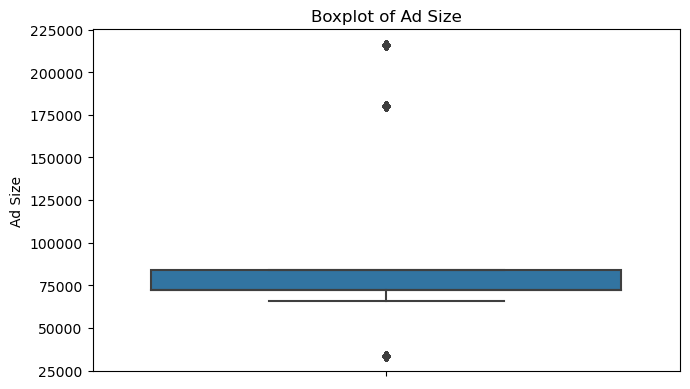

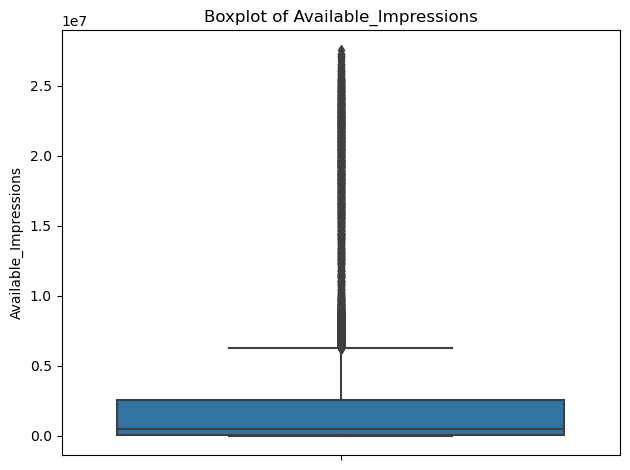

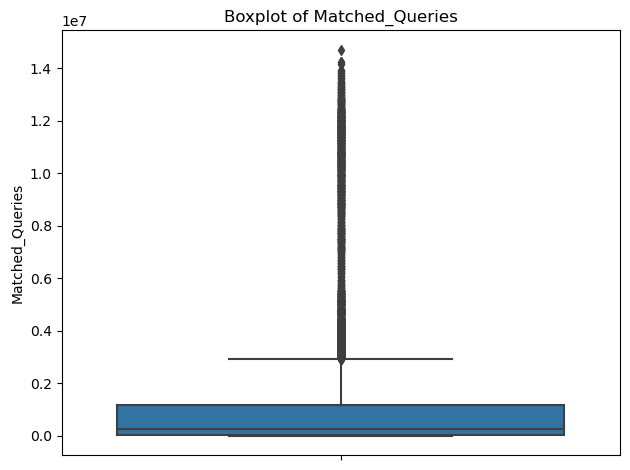

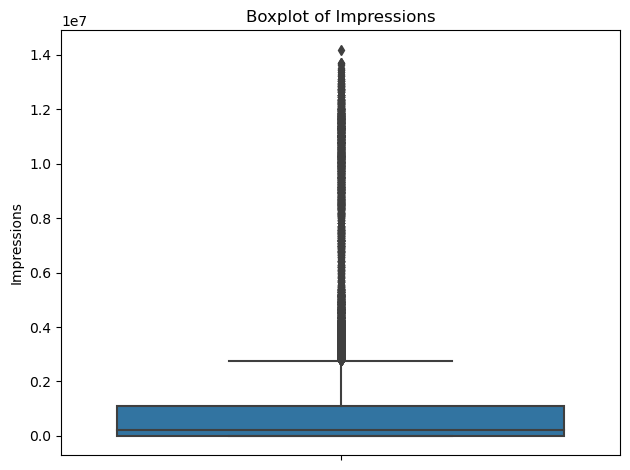

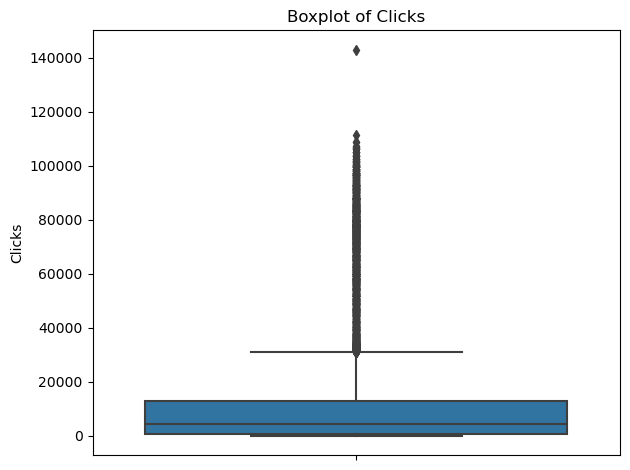

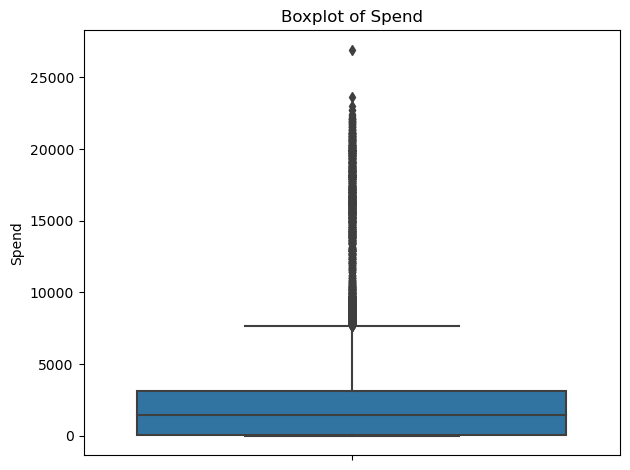

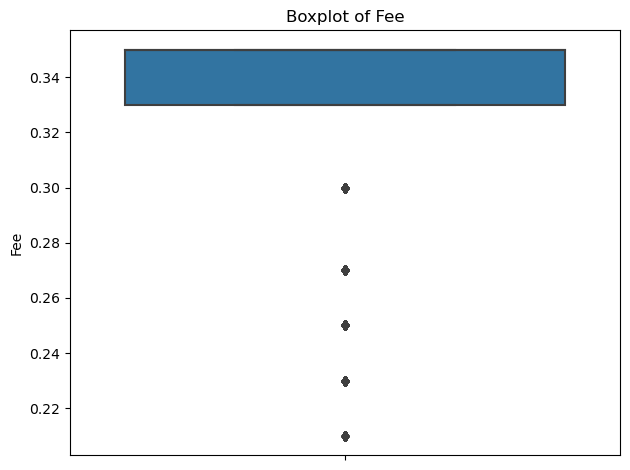

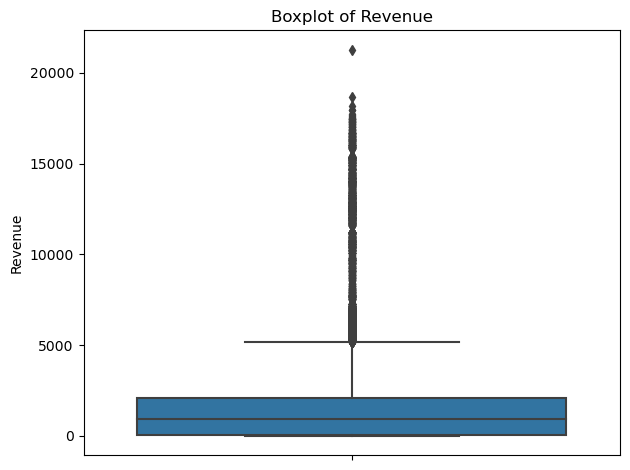

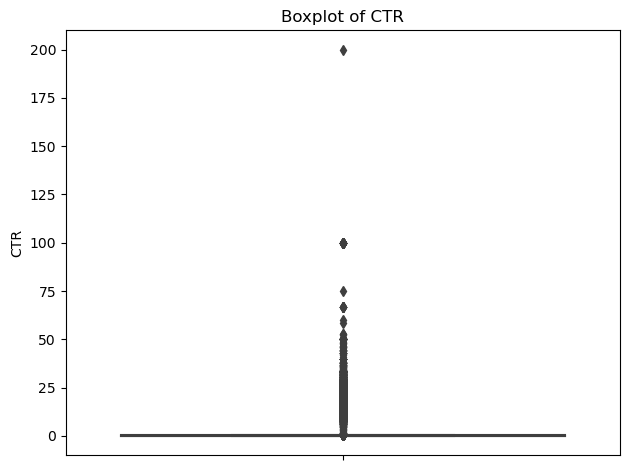

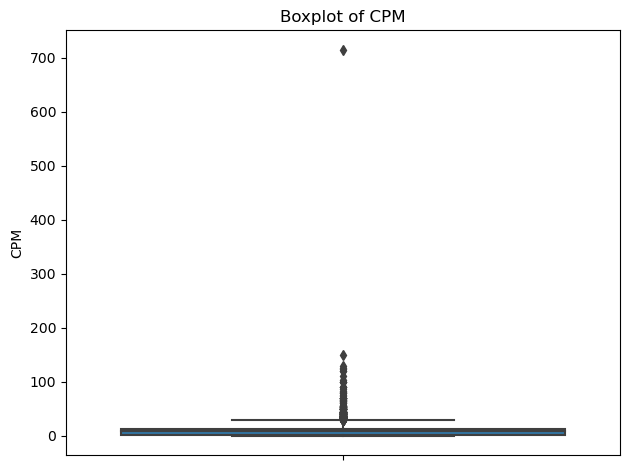

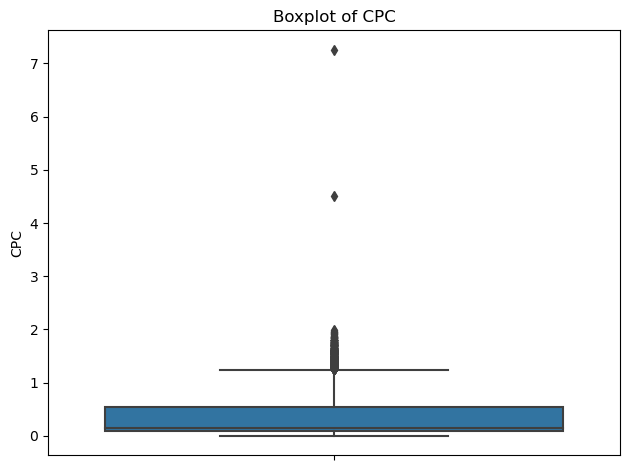

In [62]:
plt.figure(figsize = (7,4))
for i in range(len(list_df_num2)):
    sns.boxplot(y = df_num2[list_df_num2[i]], data = df_num2)
    plt.title('Boxplot of {}'.format(list_df_num2[i]))
    plt.tight_layout()
    plt.show()

In [63]:
# All the variables have outliers which need to be capped using UL & LL methods

In [64]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    LL=Q1-(1.5*IQR)
    UL=Q3+(1.5*IQR)
    return LL,UL

In [66]:
for i in list_df_num2:
    LL, UL = remove_outlier(df_num2[i])
    df_num2[i] = np.where(df_num2[i] > UL, UL, df_num2[i])
    df_num2[i] = np.where(df_num2[i] < LL, LL, df_num2[i])

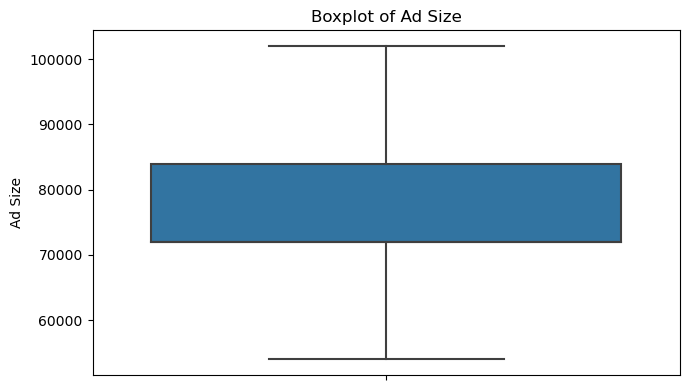

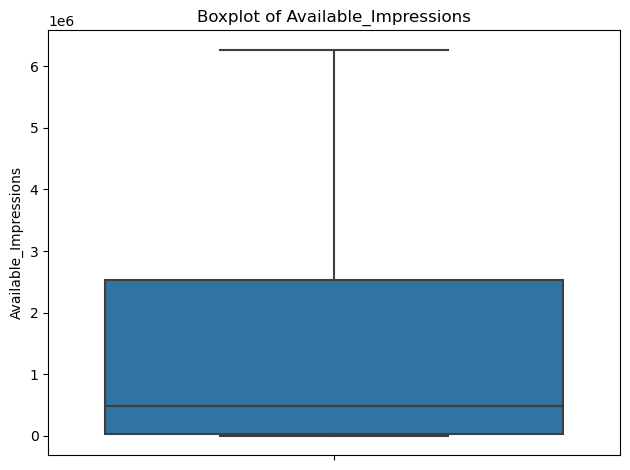

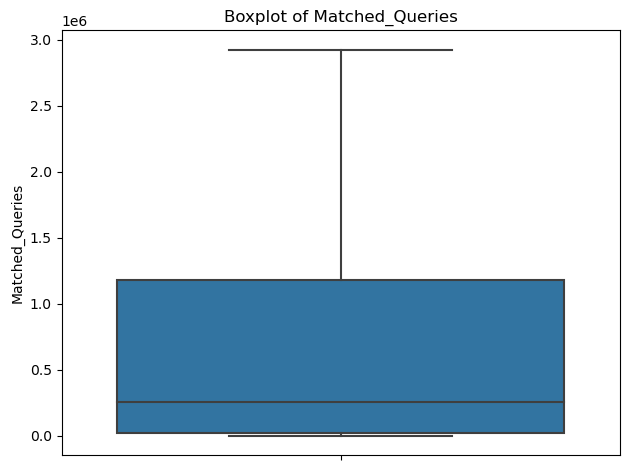

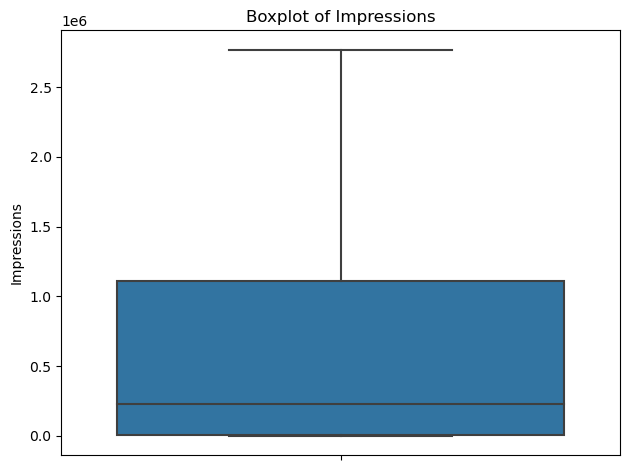

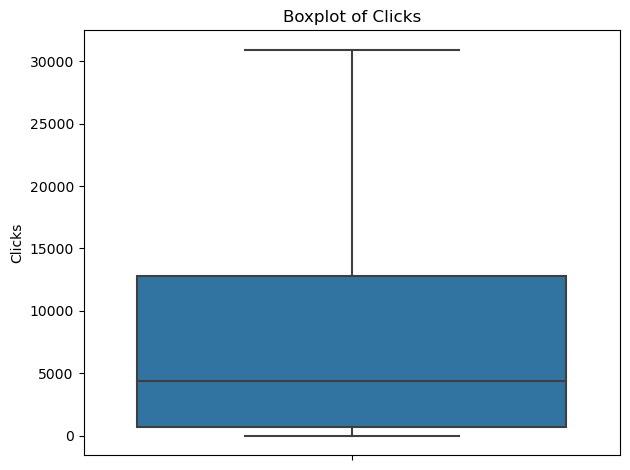

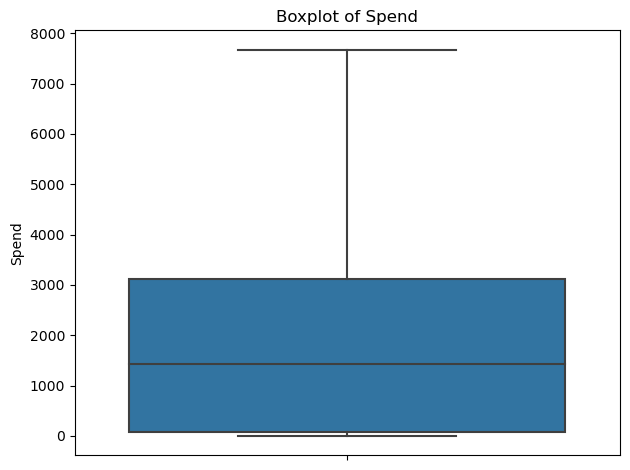

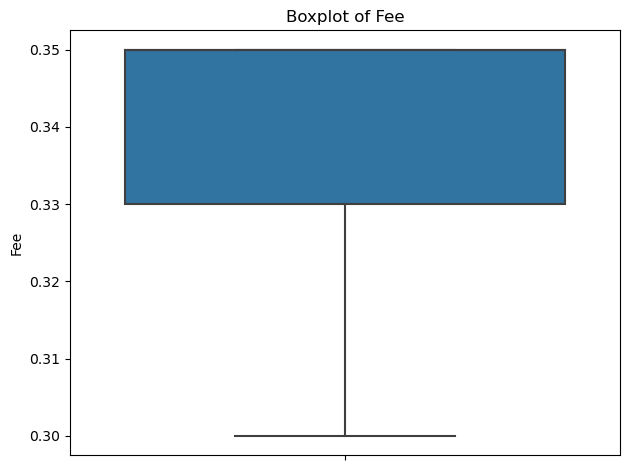

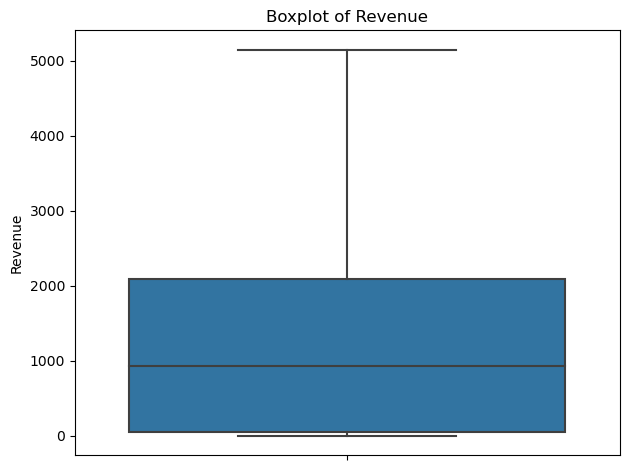

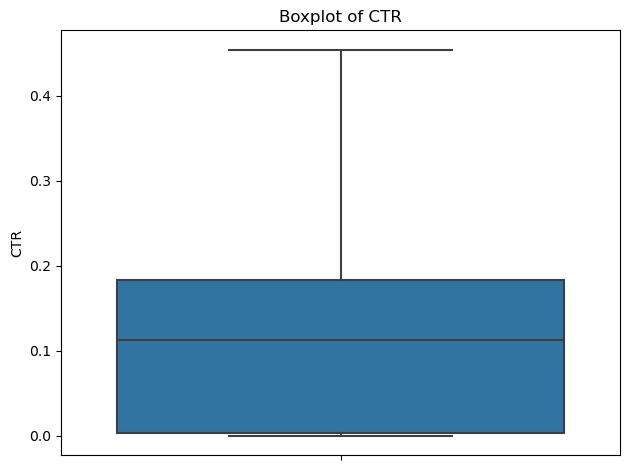

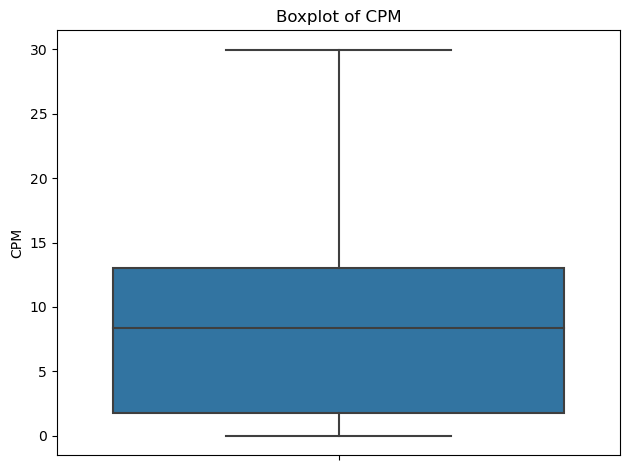

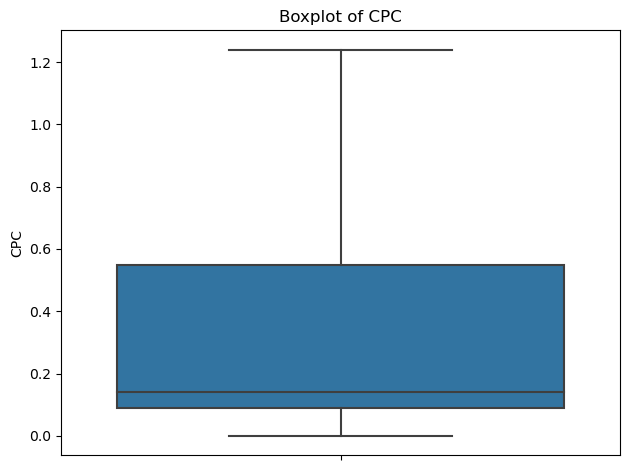

In [67]:
plt.figure(figsize = (7,4))
for i in range(len(list_df_num2)):
    sns.boxplot(y = df_num2[list_df_num2[i]], data = df_num2)
    plt.title('Boxplot of {}'.format(list_df_num2[i]))
    plt.tight_layout()
    plt.show()

### 1.10 Scaling using Zscore

In [68]:
df_scaled=df_num2.apply(zscore)
df_scaled.head()

Ad Size  Available_Impressions  Matched_Queries  Impressions    Clicks  \
0 -0.102518              -0.755333        -0.778949    -0.768478 -0.867488   
1 -0.102518              -0.755345        -0.778988    -0.768516 -0.867488   
2 -0.102518              -0.754900        -0.778919    -0.768445 -0.867488   
3 -0.102518              -0.755040        -0.778781    -0.768302 -0.867488   
4 -0.102518              -0.755610        -0.779030    -0.768560 -0.867488   

     Spend       Fee   Revenue       CTR       CPM      CPC  
0 -0.89317  0.535724 -0.880093 -0.891201 -1.194562 -1.04114  
1 -0.89317  0.535724 -0.880093 -0.888615 -1.194562 -1.04114  
2 -0.89317  0.535724 -0.880093 -0.893142 -1.194562 -1.04114  
3 -0.89317  0.535724 -0.880093 -0.898315 -1.194562 -1.04114  
4 -0.89317  0.535724 -0.880093 -0.884734 -1.194562 -1.04114

In [ ]:
Hierarchical Clustering

In [ ]:
Constructing a dendrogram using the Wardlink and Euclidean distance

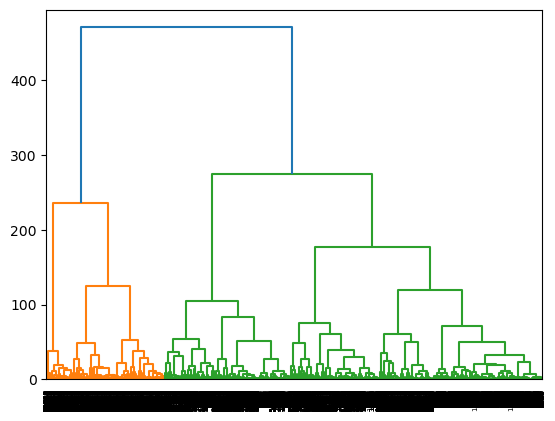

In [69]:
wardlink = linkage(df_scaled, method = 'ward')
dend = dendrogram(wardlink)

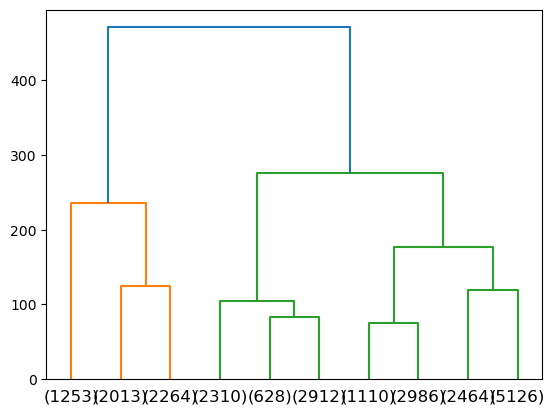

In [70]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [ ]:
Constructing clusters using warlink method

In [71]:
h_clusters = fcluster(wardlink, 3, criterion='maxclust')
h_clusters

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [72]:
# Adding clusters to original data

In [74]:
df1_copy['h_clusters']=h_clusters
df1_copy.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue    CTR   CPM   CPC  \
23061            1       1   0.07  0.35   0.0455  100.0  70.0  0.07   
23062            2       1   0.04  0.35   0.0260   50.0  20.0  0.04   
23063            1       1   0.05  0.35   0.0325  100.0  50.0  0.05   
23064            1       1   0.07  0.35   0.0455  100.0  70.0  0.07   
23065            2       1   0.09  0.35   0.0585   50.0  45.0  0.09   

       h_clusters  
23061           3  
23062           3  
23063           3  
23064           3  
23065           3

In [75]:
df1_copy.to_excel('Hierarchical_Clustering_Final.xlsx')

In [77]:
df_clust_H=df1_copy.groupby('h_clusters').mean().round(2)
cluster_freq=df1_copy['h_clusters'].value_counts().sort_index()
df_clust_H['h_freq']=cluster_freq.values
df_clust_H

Ad - Length  Ad- Width    Ad Size  Available_Impressions  \
h_clusters                                                             
1                386.08     285.04   75153.05             7947289.75   
2                430.18     146.78   54068.02             1818648.70   
3                362.19     458.58  128187.49              129206.91   

            Matched_Queries  Impressions    Clicks    Spend   Fee  Revenue  \
h_clusters                                                                   
1                4336783.80   4182648.26  24635.15  8196.52  0.29  6009.55   
2                 860143.97    820524.22   3337.57  1492.46  0.35   970.70   
3                  73463.99     60480.72   7748.89   716.53  0.35   468.37   

             CTR    CPM   CPC  h_freq  
h_clusters                             
1           0.54   4.67  0.61    5530  
2           0.06   1.85  0.56    5850  
3           4.87  13.43  0.10   11686

- Cluster 1: Ads with highest average revenue, with lesser average fee, highest average clicks and average impressions, medium average CPM, higher average CPC 
- Cluster 2: Lower average clicks, lower average CTR, lower average CPM, medium average spend  and medium CPC
- Cluster 3: Lower average CPC, highest average CPM, highest average CTR,lowest average reveune, lowest average spend, medium average clicks   
    

In [83]:
df1_copy.groupby(['h_clusters','Ad Type','Format','Platform','Device Type'])['Spend','Revenue'].mean().round(2)

Spend  Revenue
h_clusters Ad Type  Format  Platform Device Type                  
1          Inter217 Display Web      Desktop      8389.13  6166.40
                    Video   Web      Desktop      8120.08  5949.00
           Inter218 Display App      Mobile       8007.06  5856.54
                    Video   App      Mobile       8368.85  6146.83
           Inter219 Display Video    Desktop      8323.52  6115.21
...                                                   ...      ...
3          Inter228 Video   Video    Mobile        749.56   489.74
           Inter229 Display Video    Desktop       766.14   501.22
                    Video   Video    Desktop       661.64   431.63
           inter230 Display Video    Mobile        655.72   427.81
                    Video   Video    Mobile        700.07   456.33

[84 rows x 2 columns]

In [82]:
df1_copy.groupby(['Ad Type','Format','Platform','Device Type'])['CPM','CTR','CPC'].mean().round(2)

CPM   CTR   CPC
Ad Type  Format  Platform Device Type                  
Inter217 Display Web      Desktop      8.22  2.48  0.33
         Video   Web      Desktop      8.32  2.59  0.33
Inter218 Display App      Mobile       8.65  2.77  0.34
         Video   App      Mobile       8.29  2.78  0.34
Inter219 Display Video    Desktop      8.44  2.69  0.33
         Video   Video    Desktop      8.44  2.70  0.34
Inter220 Display Web      Mobile       8.73  2.78  0.33
         Video   Web      Mobile       8.28  2.63  0.34
Inter221 Display App      Mobile       9.05  2.57  0.35
         Video   App      Mobile       8.64  2.75  0.33
Inter222 Display Video    Desktop      8.37  2.76  0.34
         Video   Video    Desktop      8.19  2.41  0.34
Inter223 Display Web      Mobile       8.29  2.35  0.34
         Video   Web      Mobile       8.48  3.03  0.35
Inter224 Display Web      Desktop      8.43  2.57  0.34
         Video   Web      Desktop      8.40  2.74  0.33
Inter225 Display Video    Mobile       8.41  2.84  0.34
         Video   Video    Mobile       8.47  2.45  0.33
Inter226 Display Web      Mobile       8.43  2.26  0.33
         Video   Web      Mobile       7.94  2.57  0.34
Inter227 Display App      Mobile       8.16  2.26  0.34
         Video   App      Mobile       8.36  2.56  0.34
Inter228 Display Video    Mobile       8.55  2.60  0.34
         Video   Video    Mobile       8.35  2.58  0.34
Inter229 Display Video    Desktop      8.15  2.56  0.33
         Video   Video    Desktop      8.54  2.62  0.35
inter230 Display Video    Mobile       8.19  2.81  0.35
         Video   Video    Mobile       8.29  2.52  0.33

In [234]:
df1_copy.groupby(['Format','Device Type'])['h_clusters'].value_counts().round(2)

Format   Device Type  h_clusters
Display  Desktop      3             2076
                      2             1020
                      1             1018
         Mobile       3             3748
                      2             1871
                      1             1781
Video    Desktop      3             2118
                      2             1044
                      1              984
         Mobile       3             3744
                      2             1915
                      1             1747
Name: h_clusters, dtype: int64

In [235]:
df1_copy.groupby(['Device Type','Platform'])['h_clusters'].value_counts().round(2)

Device Type  Platform  h_clusters
Desktop      Video     3             2501
                       2             1255
                       1             1191
             Web       3             1693
                       1              811
                       2              809
Mobile       App       3             2494
                       2             1265
                       1             1183
             Video     3             2487
                       2             1242
                       1             1197
             Web       3             2511
                       2             1279
                       1             1148
Name: h_clusters, dtype: int64

### 1.13 K Means

In [103]:
df_scaled

Ad Size  Available_Impressions  Matched_Queries  Impressions  \
0     -0.102518              -0.755333        -0.778949    -0.768478   
1     -0.102518              -0.755345        -0.778988    -0.768516   
2     -0.102518              -0.754900        -0.778919    -0.768445   
3     -0.102518              -0.755040        -0.778781    -0.768302   
4     -0.102518              -0.755610        -0.779030    -0.768560   
...         ...                    ...              ...          ...   
23061  1.652896              -0.756182        -0.779265    -0.768806   
23062  1.652896              -0.756181        -0.779264    -0.768805   
23063  1.652896              -0.756182        -0.779265    -0.768806   
23064 -0.297564              -0.756179        -0.779265    -0.768806   
23065  1.652896              -0.756182        -0.779264    -0.768805   

         Clicks     Spend       Fee   Revenue       CTR       CPM       CPC  
0     -0.867488 -0.893170  0.535724 -0.880093 -0.891201 -1.194562 -1.041140  
1     -0.867488 -0.893170  0.535724 -0.880093 -0.888615 -1.194562 -1.041140  
2     -0.867488 -0.893170  0.535724 -0.880093 -0.893142 -1.194562 -1.041140  
3     -0.867488 -0.893170  0.535724 -0.880093 -0.898315 -1.194562 -1.041140  
4     -0.867488 -0.893170  0.535724 -0.880093 -0.884734 -1.194562 -1.041140  
...         ...       ...       ...       ...       ...       ...       ...  
23061 -0.867488 -0.893141  0.535724 -0.880066  2.027108  3.162016 -0.820450  
23062 -0.867488 -0.893154  0.535724 -0.880078  2.027108  1.712246 -0.915032  
23063 -0.867488 -0.893150  0.535724 -0.880074  2.027108  3.162016 -0.883504  
23064 -0.867488 -0.893141  0.535724 -0.880066  2.027108  3.162016 -0.820450  
23065 -0.867488 -0.893133  0.535724 -0.880058  2.027108  3.162016 -0.757396  

[23066 rows x 11 columns]

In [104]:
k_means=KMeans(n_clusters=2)
k_means.fit(df_scaled)

KMeans(n_clusters=2)

In [105]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [106]:
k_means.inertia_

142414.4718775063

### 1.14 Plot the Elbow curve

In [107]:
wss=[]

In [108]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [109]:
wss

[253726.00000000067,
 142414.39715260785,
 104382.57711174723,
 74718.29260909933,
 59611.25245495574,
 52041.85047517175,
 44828.35714042672,
 39347.87984288174,
 36409.57337157424,
 32970.992896818825]

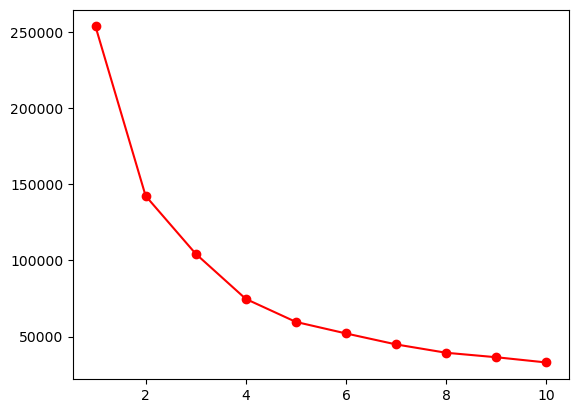

In [120]:
plt.plot(range(1,11), wss, marker='o',color='red');

### 1.15 Check Silhouette Scores

In [111]:
s_score=[]

In [112]:
for i in range(2,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(df_scaled)
    labels=k_means.labels_
    s_score.append(silhouette_score(df_scaled,labels))

In [113]:
s_score

[0.45980810375877795,
 0.36921439403525447,
 0.42467380036745245,
 0.4163712389167128,
 0.4008366057512478,
 0.3997741934343787,
 0.41005578380881896,
 0.4269225273453385,
 0.411894803403356]

### 1.16 Figure out the appropriate number of clusters

In [121]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_scaled)
labels=k_means.labels_

In [122]:
df2_copy['k_clusters']=labels
df2_copy

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue       CTR   CPM   CPC  \
0              323       1   0.00  0.35   0.0000    0.0031   0.0  0.00   
1              285       1   0.00  0.35   0.0000    0.0035   0.0  0.00   
2              355       1   0.00  0.35   0.0000    0.0028   0.0  0.00   
3              495       1   0.00  0.35   0.0000    0.0020   0.0  0.00   
4              242       1   0.00  0.35   0.0000    0.0041   0.0  0.00   
...            ...     ...    ...   ...      ...       ...   ...   ...   
23061            1       1   0.07  0.35   0.0455  100.0000  70.0  0.07   
23062            2       1   0.04  0.35   0.0260   50.0000  20.0  0.04   
23063            1       1   0.05  0.35   0.0325  100.0000  50.0  0.05   
23064            1       1   0.07  0.35   0.0455  100.0000  70.0  0.07   
23065            2       1   0.09  0.35   0.0585   50.0000  45.0  0.09   

       k_clusters  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
23061           1  
23062           1  
23063           1  
23064           1  
23065           1  

[23066 rows x 20 columns]

In [123]:
df2_copy.to_excel('k_means_Clustering_Final.xlsx')

In [124]:
df_clust_K=df2_copy.groupby('k_clusters').mean().round(2)
cluster_freq=df2_copy['k_clusters'].value_counts().sort_index()
df_clust_K['k_freq']=cluster_freq.values
df_clust_K

Ad - Length  Ad- Width    Ad Size  Available_Impressions  \
k_clusters                                                             
0                425.14     149.82   54588.81             1872875.16   
1                364.74     457.79  128929.32              117382.32   
2                466.27     199.01   75182.01            10416675.83   
3                176.88     554.83   84117.36              788505.69   

            Matched_Queries  Impressions    Clicks    Spend   Fee  Revenue  \
k_clusters                                                                   
0                 894682.56    855411.68   3371.33  1553.04  0.35  1012.08   
1                  65125.17     53392.02   6731.76   609.04  0.35   395.94   
2                5641383.47   5462313.17  11274.42  8668.88  0.29  6391.03   
3                 551944.35    465866.51  63703.59  6772.91  0.29  4851.70   

             CTR    CPM   CPC  k_freq  
k_clusters                             
0           0.06   1.84  0.56    6103  
1           4.96  13.40  0.10   11290  
2           0.03   1.57  0.76    4037  
3           2.33  15.20  0.11    1636

# Part 2

### 2.1 Problem Definition

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages. The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

### 2.2 Loading Data

In [125]:
DF=pd.read_excel('PCA_India_Data_Census.xlsx')

In [127]:
DF_copy=DF.copy()

In [160]:
DF_Copy1=DF_copy.copy()

In [199]:
DF_Copy2=DF_Copy1.copy()

In [219]:
DF_Copy3=DF_Copy2.copy()

In [126]:
DF.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [128]:
DF.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

### 2.3 Checking Shape

In [129]:
DF.shape

(640, 61)

In [6]:
# The data set has 640 rows and 61 columns

### 2.4 Data Types

In [130]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [8]:
# All the variables are float datatype and doest not have null values

### 2.5 Selecting only 5 varibales

1. F_06 - Population in the age group 0-6 Female
2. F_SC - Scheduled Castes population Female
3. F_ST - Scheduled Tribes population Female
4. F_LIT - Literates population Female
5. F_ILL - Illiterate Female

### 2.6 Statistical Summary

In [131]:
DF[['F_06','F_SC','F_ST','F_LIT','F_ILL']].describe().T

count          mean           std    min       25%      50%       75%  \
F_06   640.0  11942.300000  11326.294567   56.0   4672.25   8663.0  15902.25   
F_SC   640.0  20778.392188  21727.887713    0.0   5603.25  13709.0  29180.00   
F_ST   640.0  10155.640625  15875.701488    0.0    429.50   3834.5  12480.25   
F_LIT  640.0  66359.565625  75037.860207  371.0  20932.00  43796.5  84799.75   
F_ILL  640.0  56012.518750  47116.693769  327.0  22367.00  42386.0  78471.00   

            max  
F_06    95129.0  
F_SC   156429.0  
F_ST   130119.0  
F_LIT  571140.0  
F_ILL  254160.0

In [11]:
# Each district have atleast 56 female child of age 0-6
# Few states/districts does not have scheduled caste and scheculed tribe female population
# On an average 59K female population are literate in each ditrict/state
# Each district/state have atleast 327 female population who are illiterate

In [132]:
DF_selected5=DF[['F_06','F_SC','F_ST','F_LIT','F_ILL']]

In [133]:
DF_selected5.head()

F_06  F_SC   F_ST  F_LIT  F_ILL
0  6196     0   2598  11364  18432
1  3733     6    517   7891  15211
2  1018     6   9723   5840   5124
3   677     0   3968   1962   2244
4  4587    33  10843  13477  16504

### Exploratory Data Analysis

### 2.7 Univariate Analysis

In [135]:
DF_selected5_columns=list(DF_selected5.columns.values)
len(DF_selected5_columns)

5

In [15]:
# Creating a function and a for loop for doing univariate analysis using the 5 selected varailable 

In [136]:
def univariate_Analysis(column,nbins):
    print('Description of' + column)
    print('------------------------')
    print(DF[column].describe().round(2))
    
    fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(8,5))
    
    
    plt.figure()
    ax=axs[0].hist(DF[column], bins=nbins, histtype="bar", edgecolor='Black', color='yellow', lw=2);
    axs[0].set_title('Distribution of' + column);
  
    
    plt.figure()
    ax=axs[1].boxplot(x=DF[column]);
    axs[1].set_title('Boxplot of' + column);
    plt.show();
    
    
    plt.tight_layout();
    plt.show();
    
    



Description ofF_06
------------------------
count      640.00
mean     11942.30
std      11326.29
min         56.00
25%       4672.25
50%       8663.00
75%      15902.25
max      95129.00
Name: F_06, dtype: float64


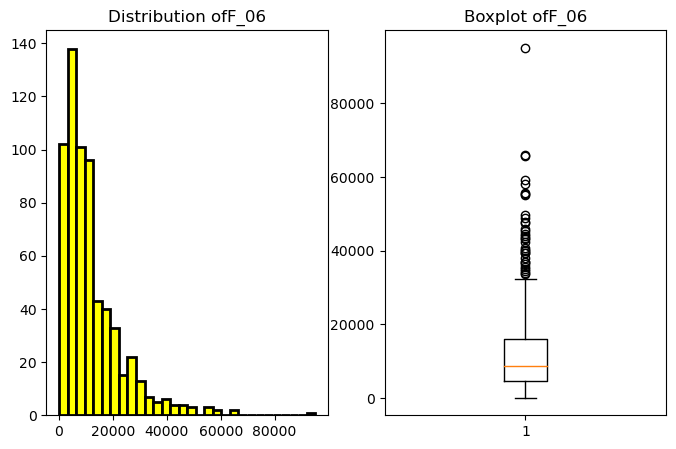

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Description ofF_SC
------------------------
count       640.00
mean      20778.39
std       21727.89
min           0.00
25%        5603.25
50%       13709.00
75%       29180.00
max      156429.00
Name: F_SC, dtype: float64


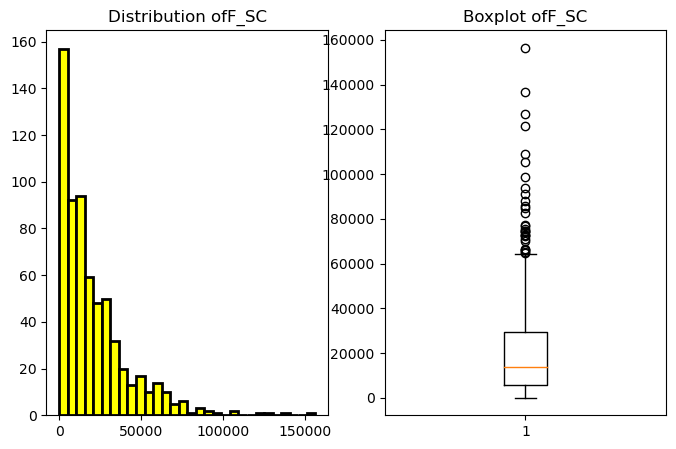

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Description ofF_ST
------------------------
count       640.00
mean      10155.64
std       15875.70
min           0.00
25%         429.50
50%        3834.50
75%       12480.25
max      130119.00
Name: F_ST, dtype: float64


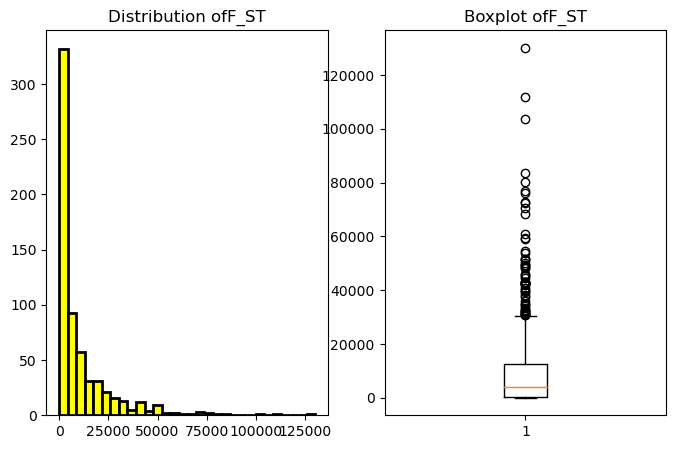

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Description ofF_LIT
------------------------
count       640.00
mean      66359.57
std       75037.86
min         371.00
25%       20932.00
50%       43796.50
75%       84799.75
max      571140.00
Name: F_LIT, dtype: float64


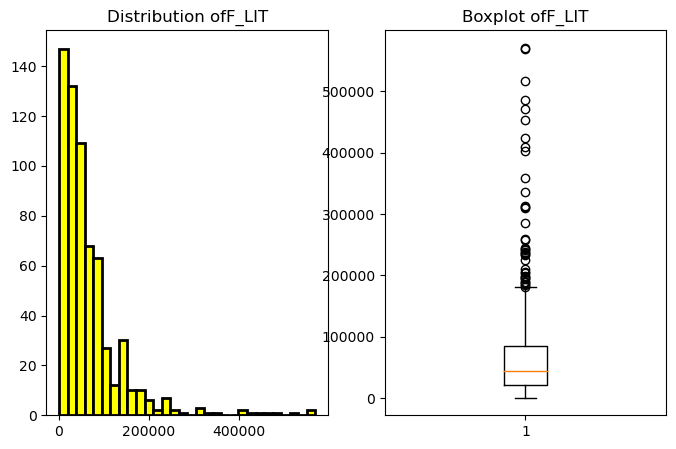

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Description ofF_ILL
------------------------
count       640.00
mean      56012.52
std       47116.69
min         327.00
25%       22367.00
50%       42386.00
75%       78471.00
max      254160.00
Name: F_ILL, dtype: float64


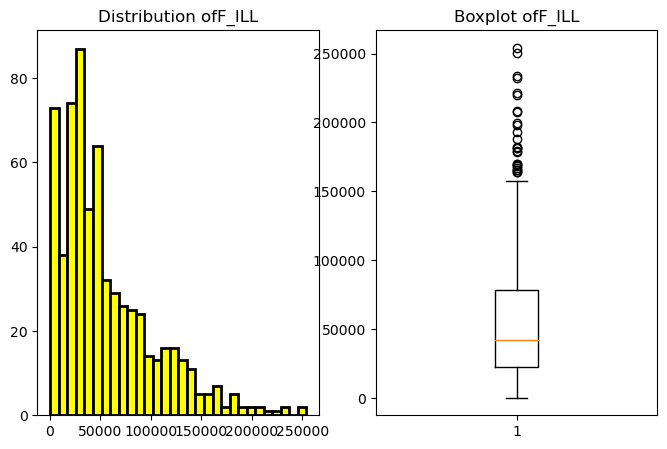

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [137]:
for i in DF_selected5_columns:
    univariate_Analysis(i,30)

In [18]:
# F_06 is right skewed and has outliers
# F_SC is right skewed and has outliers. The distance between 75% and max value is higher
# F_ST is right skewed and has outliers. The min value is 0 and the max value goes till 1.3 L
# F_LIT is right skewed and has outliers.
# F_ILL is right skewed and has outliers.

### 2.8  Bivariate Analysis

<Figure size 1200x700 with 0 Axes>

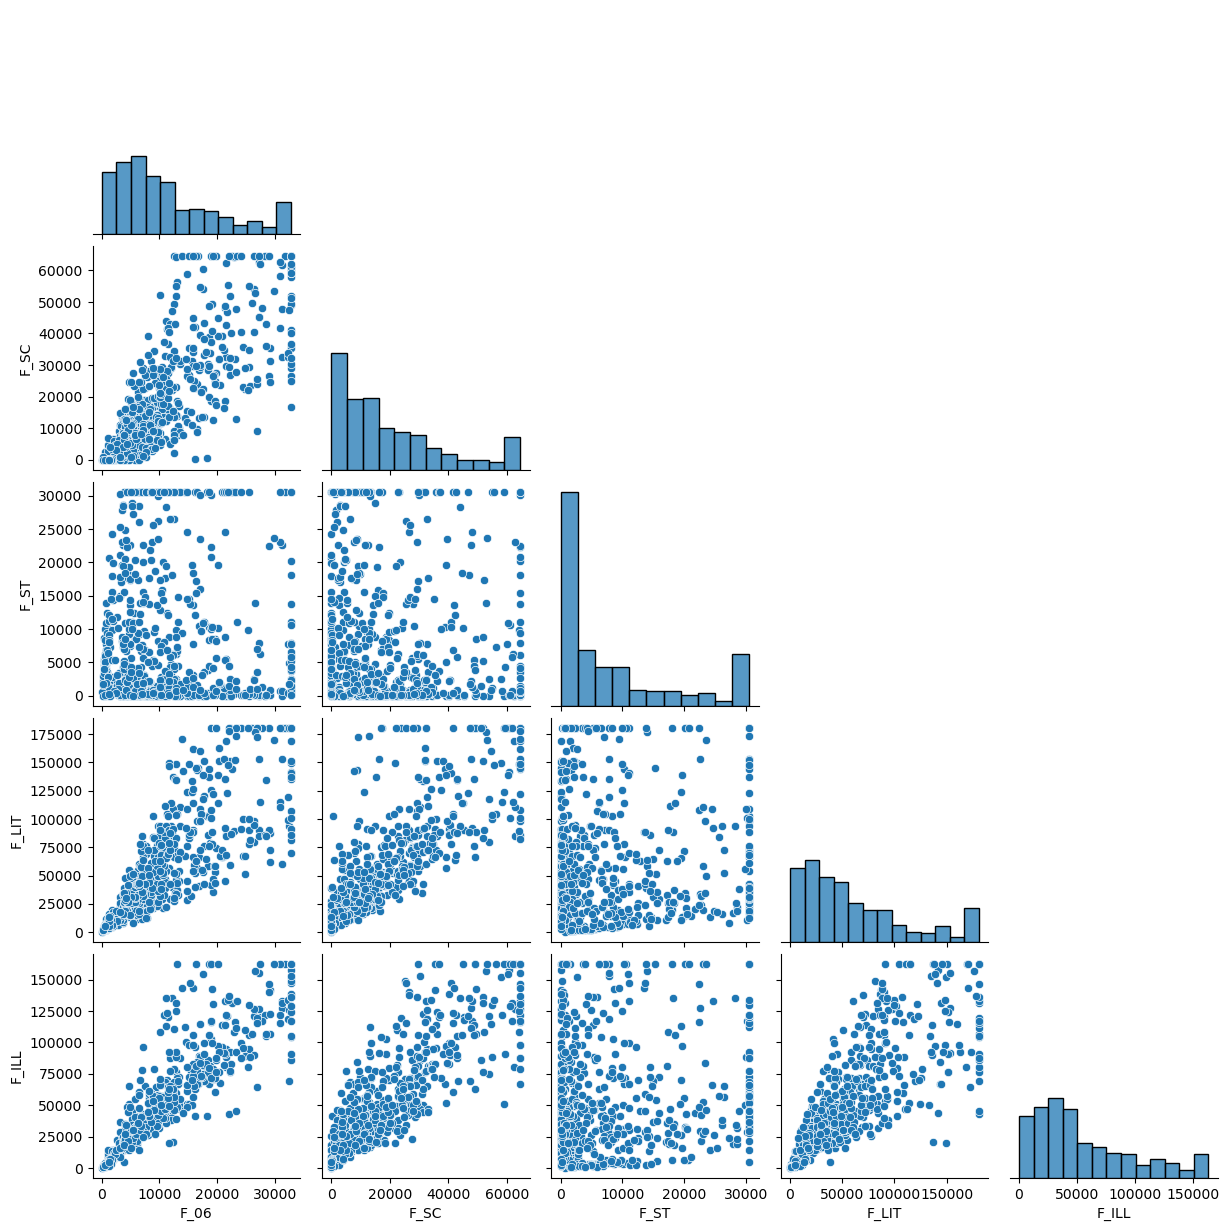

In [151]:
plt.figure(figsize=(12,7))
sns.pairplot(data=DF,vars=DF_selected5_columns,corner=True);

In [20]:
# F_06 with other variables excpet F_ST has positive correlation
# F_SC has postive correlation with F_ILL, F_LIT & F_06. 
# F_ST has less F_LIT rate among the female population
# F_LIT has positive correlation with F_ILL

### 2.9 Multivariate Analysis

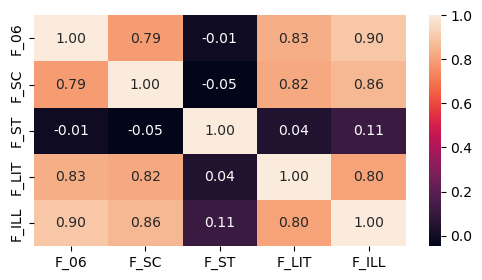

In [154]:
plt.figure(figsize=(6,3))
sns.heatmap(data=DF[DF_selected5_columns].corr(),annot=True,fmt='.2f');

In [22]:
# F_06 has a strong correlation with F_ILL, F_LIT & F_SC
# F_SC has a strong correlation with F_ILL, F_LIT & F_06
# F_ST doest not have strong correlation with other 4 variables


### 2.10 Which state has highest gender ratio and which has the lowest? 

In [162]:
male=DF_copy.groupby(DF_copy['State'])['TOT_M'].sum().sort_values(ascending=False)
male

State
Uttar Pradesh               9043969
Maharashtra                 4196130
Bihar                       4025198
West Bengal                 3912553
Karnataka                   3409482
Andhra Pradesh              3274363
Tamil Nadu                  3074009
Kerala                      2919825
Madhya Pradesh              2155608
Rajasthan                   2062563
Gujarat                     1983685
Punjab                      1579405
Odisha                      1460031
Assam                       1437268
Jharkhand                   1202623
Haryana                     1167816
Chhattisgarh                 838404
NCT of Delhi                 833414
Uttarakhand                  613924
Himachal Pradesh             483381
Jammu & Kashmir              421213
Meghalaya                    268036
Tripura                      160457
Manipur                      145524
Goa                          118979
Nagaland                      73506
Puducherry                    70386
Mizoram               

In [163]:
female=DF_copy.groupby(DF_copy['State'])['TOT_F'].sum().sort_values(ascending=False)
female

State
Uttar Pradesh               12023885
Maharashtra                  7138557
Andhra Pradesh               6097235
West Bengal                  6016118
Tamil Nadu                   5610310
Bihar                        5405883
Karnataka                    5345675
Kerala                       4856357
Madhya Pradesh               3369745
Rajasthan                    2966496
Gujarat                      2939472
Odisha                       2536980
Punjab                       2121425
Assam                        2093432
Jharkhand                    1763884
Chhattisgarh                 1526592
Haryana                      1498873
NCT of Delhi                 1075266
Uttarakhand                   973147
Himachal Pradesh              752062
Jammu & Kashmir               572959
Meghalaya                     356355
Tripura                       256370
Manipur                       226963
Goa                           191393
Nagaland                      125935
Puducherry                    11

In [164]:
state_ratio=male/female
state_ratio.sort_values(ascending=False)

State
Lakshadweep                 0.868061
Haryana                     0.779129
NCT of Delhi                0.775077
Uttar Pradesh               0.752167
Meghalaya                   0.752160
Bihar                       0.744596
Punjab                      0.744502
Jammu & Kashmir             0.735154
Daman & Diu                 0.703143
Chandigarh                  0.700037
Rajasthan                   0.695286
Assam                       0.686561
Jharkhand                   0.681804
Gujarat                     0.674844
Andaman & Nicobar Island    0.652679
West Bengal                 0.650345
Dadara & Nagar Havelli      0.644631
Himachal Pradesh            0.642741
Sikkim                      0.642227
Manipur                     0.641179
Madhya Pradesh              0.639695
Karnataka                   0.637802
Uttarakhand                 0.630865
Tripura                     0.625881
Mizoram                     0.623634
Goa                         0.621648
Kerala                      0.60

In [26]:
# Highest Gender Ratio - State: Lakshadweep
# Lowest Gender Ratio - State: Andhra Pradesh

### 2.11 Which district has the highest & lowest gender ratio?

In [165]:
male1=DF_copy.groupby(DF_copy['Area Name'])['TOT_M'].sum().sort_values(ascending=False)
male1

Area Name
Mumbai Suburban               485417
Malappuram                    477790
North Twenty Four Parganas    471482
Thane                         424759
Bangalore                     401545
                               ...  
Nicobars                        1549
Lahul & Spiti                   1207
Upper Siang                     1187
Anjaw                            853
Dibang Valley                    391
Name: TOT_M, Length: 635, dtype: int64

In [166]:
female1=DF_copy.groupby(DF_copy['Area Name'])['TOT_F'].sum().sort_values(ascending=False)
female1

Area Name
Mumbai Suburban               750392
Malappuram                    739441
North Twenty Four Parganas    725514
Thane                         706327
Bangalore                     664595
                               ...  
Nicobars                        2630
Lahul & Spiti                   2358
Upper Siang                     2117
Anjaw                           1688
Dibang Valley                    698
Name: TOT_F, Length: 635, dtype: int64

In [167]:
district_ratio=male1/female1
district_ratio.sort_values(ascending=False)

Area Name
Lakshadweep       0.868061
Badgam            0.847762
Mahamaya Nagar    0.847313
Dhaulpur          0.846911
Baghpat           0.844003
                    ...   
Baudh             0.451455
West Godavari     0.450076
Virudhunagar      0.449352
Koraput           0.440769
Krishna           0.437972
Length: 635, dtype: float64

In [30]:
# Highest Gender Ratio - District: Lakshadweep
# Lowest Gender Ratio - District: Krishna

### 2.12 Data Preprocessing

In [200]:
DF_Copy1.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

In [201]:
DF_Copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

### 2.13 Check for and treat duplicates

In [202]:
print("The no. of duplicated rows are" , DF_Copy1.duplicated().sum())

The no. of duplicated rows are 0


In [34]:
# No duplicate values found

### 2.14 Check for and treat bad data

In [203]:
DF_Copy1.nunique().head(60)

State Code         35
Dist.Code         640
State              35
Area Name         635
No_HH             639
TOT_M             639
TOT_F             639
M_06              636
F_06              629
M_SC              592
F_SC              592
M_ST              557
F_ST              559
M_LIT             639
F_LIT             639
M_ILL             634
F_ILL             640
TOT_WORK_M        639
TOT_WORK_F        635
MAINWORK_M        636
MAINWORK_F        638
MAIN_CL_M         617
MAIN_CL_F         621
MAIN_AL_M         612
MAIN_AL_F         617
MAIN_HH_M         520
MAIN_HH_F         551
MAIN_OT_M         637
MAIN_OT_F         631
MARGWORK_M        627
MARGWORK_F        631
MARG_CL_M         553
MARG_CL_F         584
MARG_AL_M         605
MARG_AL_F         617
MARG_HH_M         389
MARG_HH_F         507
MARG_OT_M         604
MARG_OT_F         602
MARGWORK_3_6_M    639
MARGWORK_3_6_F    639
MARG_CL_3_6_M     622
MARG_CL_3_6_F     627
MARG_AL_3_6_M     526
MARG_AL_3_6_F     566
MARG_HH_3_

### 2.15 Check for and treat anamolies

In [ ]:
### No anamolies found

### 2.16 Check for and missing values

In [204]:
DF_Copy1.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [37]:
# No null values found

In [221]:
DF_Copy2_cat=DF_Copy2.select_dtypes(include=['object'])
DF_Copy2_cat.head()

State    Area Name
0  Jammu & Kashmir      Kupwara
1  Jammu & Kashmir       Badgam
2  Jammu & Kashmir  Leh(Ladakh)
3  Jammu & Kashmir       Kargil
4  Jammu & Kashmir        Punch

### 2.17 Dropping of unrelavant variables/columns 

In [205]:
DF_Copy1.drop(['State Code','Dist.Code','State','Area Name'],axis=1,inplace=True)
DF_Copy1

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0     7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1     6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2     4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3     1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4    11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   
..     ...    ...    ...   ...   ...   ...   ...   ...    ...    ...  ...   
635   3333   8154  11781  1146  1203    21    30     0      0   6916  ...   
636  10612  12346  21691  1544  1533  2234  4155     0      0  10292  ...   
637   1275   1549   2630   227   225     0     0  1012   1750   1187  ...   
638   3762   5200   8012   723   664     0     0    28     50   4206  ...   
639   7975  11977  18049  1470  1358     0     0   161    264  10095  ...   

     MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0             1150            749            180            237   
1              525            715            123            229   
2              114            188             44             89   
3              194            247             61            128   
4              874           1928            465           1043   
..             ...            ...            ...            ...   
635             32             47              0              0   
636            155            337              3             14   
637            104            134              9              4   
638            136            172             24             44   
639            173            122              6              2   

     MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0              680            252             32             46         258   
1              186            148             76            178         140   
2                3             34              0              4          67   
3               13             50              4             10         116   
4              205            302             24            105         180   
..             ...            ...            ...            ...         ...   
635              0              0              0              0          32   
636             38            130              4             23         110   
637              2              6             17             47          76   
638             11             21              1              4         100   
639             17             17              2              4         148   

     NON_WORK_F  
0           214  
1           160  
2            61  
3            59  
4           478  
..          ...  
635          47  
636         170  
637          77  
638         103  
639          99  

[640 rows x 57 columns]

### 2.18 Check for and treat outliers

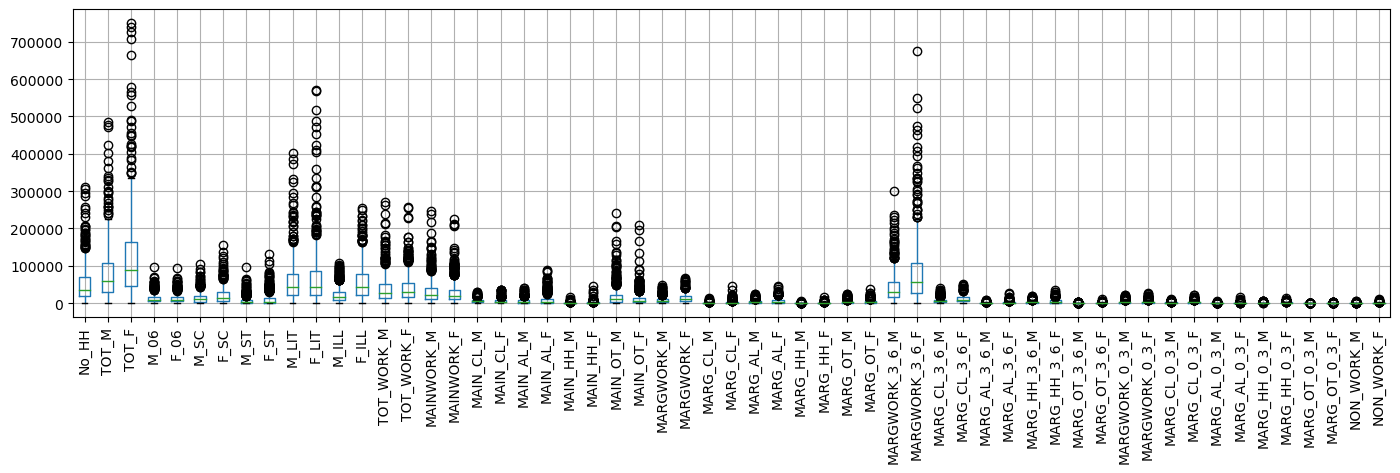

In [206]:
DF_Copy1.boxplot(figsize=(17,4))
plt.xticks(rotation=90)
plt.show()

In [207]:
DF_Copy1_scaled=DF.apply(zscore)
DF_Copy1_scaled.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -1.038986 -0.874837 -0.937027 -0.624685 -0.561282 -1.080201 -1.079963   
1 -1.076896 -0.938023 -1.009723 -0.773932 -0.835657 -1.079873 -1.079635   
2 -1.121858 -1.154665 -1.141539 -1.141642 -1.138104 -1.080201 -1.079635   
3 -1.201599 -1.217171 -1.214930 -1.197772 -1.176091 -1.080447 -1.079963   
4 -0.938495 -0.921309 -0.935018 -0.700931 -0.740523 -1.078807 -1.078160   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.510440 -0.574198 -0.939617  ...      -0.093587      -0.860882   
1 -0.771833 -0.782092 -1.005083  ...      -0.719169      -0.877096   
2  0.122588  0.137599 -1.141561  ...      -1.130551      -1.128423   
3 -0.399531 -0.437333 -1.203009  ...      -1.050477      -1.100286   
4  0.432534  0.249489 -0.942767  ...      -0.369844      -0.298617   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.041800      -0.423378       0.523468      -0.793688      -0.443385   
1      -0.347040      -0.443790      -0.634478      -0.884805       0.358782   
2      -0.770091      -0.800999      -1.063434      -0.984684      -1.026779   
3      -0.679055      -0.701491      -1.039994      -0.970666      -0.953855   
4       1.484398       1.633130      -0.589942      -0.749882      -0.589234   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.756991   -0.497493   -0.774865  
1       0.088391   -0.813235   -0.880662  
2      -1.025976   -1.008568   -1.074622  
3      -0.987550   -0.877454   -1.078541  
4      -0.379131   -0.706204   -0.257637  

[5 rows x 57 columns]

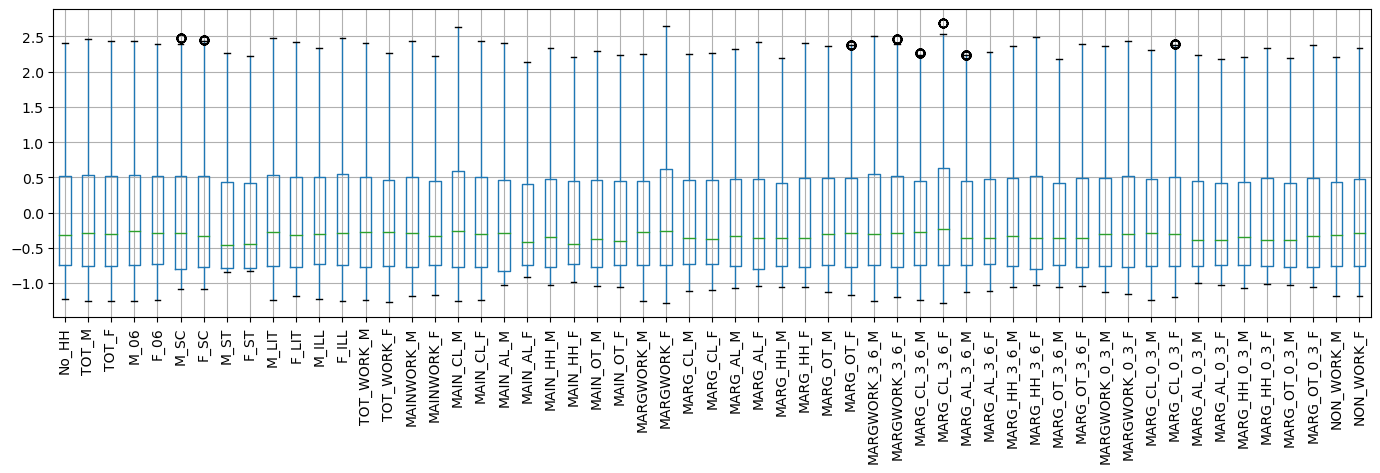

In [209]:
DF_Copy1_scaled.boxplot(figsize=(17,4))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# There are vey few outliers after scaling the data comparatively before scaling 

In [210]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    LL=Q1-(1.5*IQR)
    UL=Q3+(1.5*IQR)
    return LL,UL

In [211]:
for i in flist:
    LL, UL = remove_outlier(DF_Copy1_scaled[i])
    DF_Copy1_scaled[i] = np.where(DF_Copy1_scaled[i] > UL, UL, DF_Copy1_scaled[i])
    DF_Copy1_scaled[i] = np.where(DF_Copy1_scaled[i] < LL, LL, DF_Copy1_scaled[i])

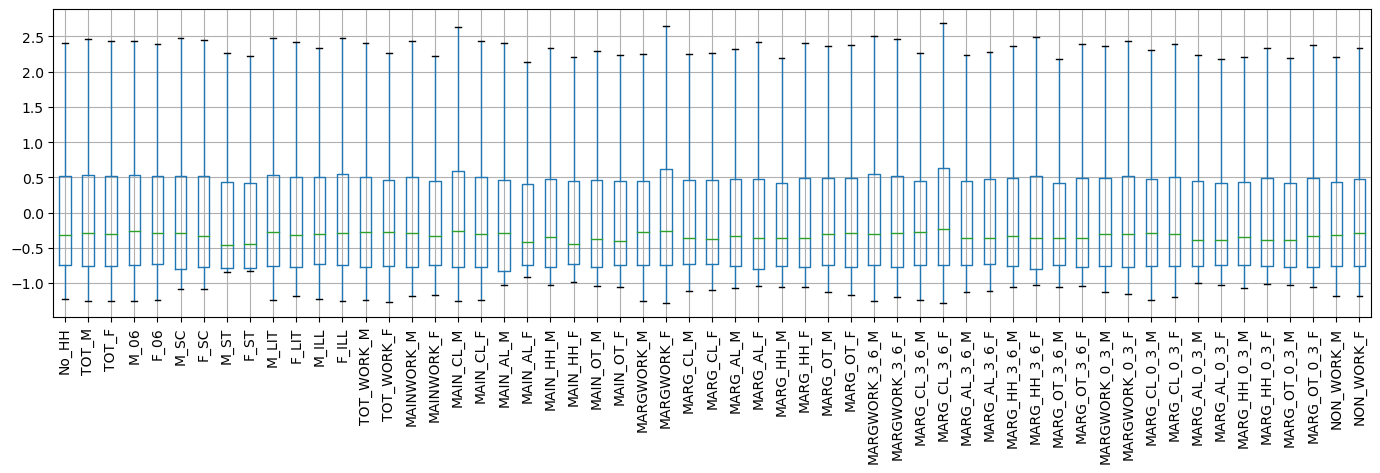

In [212]:
DF_Copy1_scaled.boxplot(figsize=(17,4))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# The outliers are capped to thier LL & UL respectively 

In [41]:
# There are presence of outliers across all the independent variables 

In [46]:
len(flist)

57

### 2.19 Zscore Scaling

In [47]:
# Since the independent varaibales 

In [149]:
DF_scaled=DF.apply(zscore)
DF_scaled.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -1.038986 -0.874837 -0.937027 -0.624685 -0.561282 -1.080201 -1.079963   
1 -1.076896 -0.938023 -1.009723 -0.773932 -0.835657 -1.079873 -1.079635   
2 -1.121858 -1.154665 -1.141539 -1.141642 -1.138104 -1.080201 -1.079635   
3 -1.201599 -1.217171 -1.214930 -1.197772 -1.176091 -1.080447 -1.079963   
4 -0.938495 -0.921309 -0.935018 -0.700931 -0.740523 -1.078807 -1.078160   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.510440 -0.574198 -0.939617  ...      -0.093587      -0.860882   
1 -0.771833 -0.782092 -1.005083  ...      -0.719169      -0.877096   
2  0.122588  0.137599 -1.141561  ...      -1.130551      -1.128423   
3 -0.399531 -0.437333 -1.203009  ...      -1.050477      -1.100286   
4  0.432534  0.249489 -0.942767  ...      -0.369844      -0.298617   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.041800      -0.423378       0.523468      -0.793688      -0.443385   
1      -0.347040      -0.443790      -0.634478      -0.884805       0.358782   
2      -0.770091      -0.800999      -1.063434      -0.984684      -1.026779   
3      -0.679055      -0.701491      -1.039994      -0.970666      -0.953855   
4       1.484398       1.633130      -0.589942      -0.749882      -0.589234   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.756991   -0.497493   -0.774865  
1       0.088391   -0.813235   -0.880662  
2      -1.025976   -1.008568   -1.074622  
3      -0.987550   -0.877454   -1.078541  
4      -0.379131   -0.706204   -0.257637  

[5 rows x 57 columns]

##  PCA

### 2.20 Checking the statistical significance of correlations

In [51]:
# H0: Correlations are not significant
# H1: There are significant correlations
# Reject H0 if p-value < 0.05

In [168]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(DF_scaled)
print("The p value is",p_value)

The p value is 0.0


In [53]:
# Since the p value is less than we reject the H0 and 
# conclude there are significant coorelations between the idependnet varaiables. So we can proceed with PCA

### 2.21 Confirm the adequacy of sample size

In [54]:
# Condition: Above 0.7 is acceptable, below 0.5 is not acceptable

In [169]:
import warnings 
warnings.filterwarnings('ignore')

In [171]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(DF_scaled)
print('The KMO value is ',kmo_model)

The KMO value is  0.9361896166652944


In [57]:
# Since the value is > 0.7 the sample size is adequate to do the PCA

### 2.22 FIt and Transform PCA Model

In [58]:
#Apply PCA taking all features

In [172]:
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(DF_scaled)

### 2.23 Covariance Matrix

In [173]:
pd.DataFrame(pca.get_covariance(),columns=DF_scaled.columns,index=DF_scaled.columns)

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC  \
No_HH           1.001565  0.912699  0.973013  0.812856  0.809883  0.806713   
TOT_M           0.912699  1.001565  0.980122  0.965044  0.960153  0.877158   
TOT_F           0.973013  0.980122  1.001565  0.914418  0.911167  0.857664   
M_06            0.812856  0.965044  0.914418  1.001565  0.999032  0.833344   
F_06            0.809883  0.960153  0.911167  0.999032  1.001565  0.823888   
M_SC            0.806713  0.877158  0.857664  0.833344  0.823888  1.001565   
F_SC            0.858562  0.861703  0.876435  0.796794  0.790043  0.984688   
M_ST            0.116300  0.023439  0.076189 -0.006081  0.006803 -0.096913   
F_ST            0.122722  0.013301  0.074248 -0.021166 -0.007896 -0.099226   
M_LIT           0.931350  0.989312  0.983281  0.924761  0.915929  0.868007   
F_LIT           0.940747  0.937579  0.963424  0.844453  0.835104  0.805082   
M_ILL           0.782405  0.933452  0.880243  0.967971  0.972547  0.822290   
F_ILL           0.896107  0.917169  0.928913  0.896778  0.900544  0.842658   
TOT_WORK_M      0.938328  0.977458  0.974326  0.898655  0.893232  0.868242   
TOT_WORK_F      0.948620  0.825119  0.904224  0.732839  0.734787  0.733823   
MAINWORK_M      0.926588  0.936031  0.943223  0.833607  0.825308  0.838925   
MAINWORK_F      0.921397  0.772433  0.858357  0.650808  0.651110  0.690579   
MAIN_CL_M       0.522335  0.629559  0.586212  0.649146  0.650964  0.645914   
MAIN_CL_F       0.457357  0.413760  0.452244  0.430757  0.437133  0.398906   
MAIN_AL_M       0.742109  0.684407  0.718934  0.646443  0.655998  0.666125   
MAIN_AL_F       0.680048  0.489614  0.588526  0.415484  0.424655  0.484640   
MAIN_HH_M       0.772796  0.881542  0.844553  0.833838  0.826709  0.842285   
MAIN_HH_F       0.811980  0.776562  0.807333  0.689734  0.691654  0.727225   
MAIN_OT_M       0.850983  0.844854  0.857130  0.720698  0.704311  0.737664   
MAIN_OT_F       0.873855  0.779878  0.836859  0.633151  0.623870  0.667286   
MARGWORK_M      0.722702  0.843972  0.806209  0.879278  0.888451  0.734640   
MARGWORK_F      0.757477  0.748463  0.778628  0.757948  0.763894  0.656585   
MARG_CL_M       0.228229  0.369490  0.321209  0.480766  0.488720  0.303544   
MARG_CL_F       0.152497  0.244823  0.220427  0.348873  0.352158  0.188502   
MARG_AL_M       0.511658  0.596866  0.572049  0.667742  0.688345  0.557606   
MARG_AL_F       0.574320  0.516545  0.564350  0.537628  0.551895  0.480211   
MARG_HH_M       0.626501  0.783932  0.726572  0.818890  0.828445  0.718965   
MARG_HH_F       0.675299  0.751765  0.731877  0.742656  0.752317  0.685673   
MARG_OT_M       0.805372  0.907788  0.878128  0.864446  0.859663  0.792199   
MARG_OT_F       0.850154  0.872171  0.882042  0.804012  0.800355  0.756350   
MARGWORK_3_6_M  0.860100  0.984216  0.948444  0.988942  0.984510  0.854429   
MARGWORK_3_6_F  0.913075  0.989419  0.976502  0.945007  0.939518  0.863598   
MARG_CL_3_6_M   0.738515  0.855815  0.819478  0.885478  0.895101  0.744487   
MARG_CL_3_6_F   0.781762  0.762106  0.796730  0.760755  0.766868  0.669105   
MARG_AL_3_6_M   0.267759  0.407416  0.360035  0.514534  0.523914  0.334825   
MARG_AL_3_6_F   0.175955  0.259508  0.239157  0.358558  0.361980  0.198828   
MARG_HH_3_6_M   0.524293  0.605905  0.582718  0.673928  0.694406  0.566970   
MARG_HH_3_6_F   0.583780  0.510878  0.564744  0.523142  0.537159  0.477479   
MARG_OT_3_6_M   0.628709  0.784887  0.727834  0.817895  0.826933  0.720471   
MARG_OT_3_6_F   0.676402  0.750046  0.730887  0.734511  0.743502  0.686680   
MARGWORK_0_3_M  0.809478  0.912051  0.881953  0.867721  0.862892  0.795602   
MARGWORK_0_3_F  0.855172  0.882952  0.889703  0.811850  0.807835  0.765012   
MARG_CL_0_3_M   0.604943  0.739665  0.697119  0.799076  0.805050  0.647698   
MARG_CL_0_3_F   0.617144  0.637775  0.652550  0.683667  0.689114  0.554284   
MARG_AL_0_3_M   0.092397  0.233968  0.185162  0.353449  0.356906  0.189858   
MARG_AL_0_3_F   0.076751  0.192672  0.155

### 2.24 Extracting Eigen Vectors & Eigen Values

### Eigen Vectors

In [174]:
pca.components_.round(2)

array([[ 0.15,  0.16,  0.16, ...,  0.14,  0.15,  0.14],
       [-0.12, -0.08, -0.09, ...,  0.04, -0.05, -0.04],
       [ 0.1 , -0.04,  0.03, ..., -0.1 , -0.13, -0.03],
       ...,
       [ 0.  , -0.01,  0.02, ..., -0.01,  0.06, -0.01],
       [ 0.  ,  0.05,  0.  , ...,  0.01, -0.08, -0.  ],
       [-0.  , -0.  ,  0.01, ...,  0.  ,  0.01,  0.  ]])

### Eigen Values

In [175]:
pca.explained_variance_

array([3.56488638e+01, 7.64357559e+00, 3.76919551e+00, 2.77722349e+00,
       1.90694892e+00, 1.15490310e+00, 9.87726707e-01, 4.64629906e-01,
       3.96708513e-01, 3.22346888e-01, 2.73207369e-01, 2.35647574e-01,
       1.81401107e-01, 1.69243770e-01, 1.38592325e-01, 1.31505852e-01,
       1.03809666e-01, 9.55333831e-02, 8.58580407e-02, 8.09138742e-02,
       6.60179067e-02, 6.30797999e-02, 4.82756124e-02, 4.59506197e-02,
       4.37747566e-02, 3.19339710e-02, 2.86194563e-02, 2.75481445e-02,
       2.34340044e-02, 2.20296816e-02, 1.87487040e-02, 1.59004895e-02,
       1.39957919e-02, 1.18916465e-02, 1.11133495e-02, 9.07842645e-03,
       7.25127869e-03, 6.27213692e-03, 4.95541908e-03, 4.60667097e-03,
       3.45902033e-03, 2.18408510e-03, 2.13514664e-03, 1.92111328e-03,
       1.43840980e-03, 1.09968912e-03, 9.65752052e-04, 8.62630267e-04,
       6.51634478e-04, 5.76658846e-04, 4.35790607e-04, 3.70037468e-04,
       3.06660171e-04, 2.07854170e-04, 1.38286484e-04, 8.97034441e-05,
      

### 2.25 Extracting the Variability of the PC's

In [63]:
# Check the explained variance for each PC
# Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)

In [176]:
pca.explained_variance_ratio_

array([6.24441446e-01, 1.33888289e-01, 6.60229147e-02, 4.86470891e-02,
       3.34029704e-02, 2.02297994e-02, 1.73014629e-02, 8.13866529e-03,
       6.94892379e-03, 5.64637229e-03, 4.78562250e-03, 4.12770833e-03,
       3.17750294e-03, 2.96454958e-03, 2.42764517e-03, 2.30351534e-03,
       1.81837655e-03, 1.67340548e-03, 1.50392785e-03, 1.41732362e-03,
       1.15639919e-03, 1.10493400e-03, 8.45617224e-04, 8.04891611e-04,
       7.66778221e-04, 5.59369722e-04, 5.01311201e-04, 4.82545623e-04,
       4.10480504e-04, 3.85881758e-04, 3.28410688e-04, 2.78520087e-04,
       2.45156553e-04, 2.08299401e-04, 1.94666401e-04, 1.59021779e-04,
       1.27016642e-04, 1.09865556e-04, 8.68013375e-05, 8.06925096e-05,
       6.05897475e-05, 3.82574118e-05, 3.74001838e-05, 3.36510796e-05,
       2.51958296e-05, 1.92626466e-05, 1.69165450e-05, 1.51102177e-05,
       1.14143210e-05, 1.01010143e-05, 7.63350323e-06, 6.48174183e-06,
       5.37159674e-06, 3.64086663e-06, 2.42228792e-06, 1.57128566e-06,
      

In [77]:
#Create a dataframe containing the loadings or coefficients of all PCs

In [177]:
DF_extracted = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                               'PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18',
                                               'PC19','PC20', 'PC21', 'PC22', 'PC23', 'PC24',
                                               'PC25','PC26', 'PC27', 'PC28', 'PC29', 'PC30',
                                                'PC31','PC32', 'PC33', 'PC34', 'PC35', 'PC36',
                                               'PC37','PC38', 'PC39', 'PC40', 'PC41', 'PC42',
                                               'PC43','PC44', 'PC45', 'PC46', 'PC47', 'PC48',
                                               'PC49','PC50', 'PC51', 'PC52', 'PC53', 'PC54',
                                               'PC55','PC56', 'PC57'],
                                    index = DF_scaled.columns)

In [178]:
DF_extracted

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090  0.082558   
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344  0.073667   
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927  0.082812   
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339  0.092379   
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326  0.080010   
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893  0.050969   
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092  0.054568   
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412 -0.231809   
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965 -0.214542   
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033  0.081378   
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084  0.102207   
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073  0.037957   
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332  0.013986   
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104  0.035802   
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931 -0.016587   
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225  0.018054   
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674 -0.051951   
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376 -0.293504   
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925 -0.269914   
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131 -0.023336   
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220 -0.056558   
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812 -0.142869   
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063 -0.318474   
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907  0.071214   
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774  0.033885   
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812  0.078655   
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624  0.099156   
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005 -0.032738   
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152 -0.031787   
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200  0.079748   
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643  0.117625   
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575 -0.169980   
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616 -0.319596   
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109  0.018232   
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756  0.002409   
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886  0.103377   
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476  0.117467   
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078  0.072381   
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349  0.070896   
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887 -0.041377   
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019 -0.049367   
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665  0.073152   
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386  0.094868   
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315 -0.174634   
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678 -0.343970   
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794  0.015826   
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596 -0.004857   
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293  0.111045   
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351  0.185882   
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070 -0.004600   
MARG_AL_0_3_F   0.056741  0.287541 -0.08809

### 2.26 Creating a Scree Plot

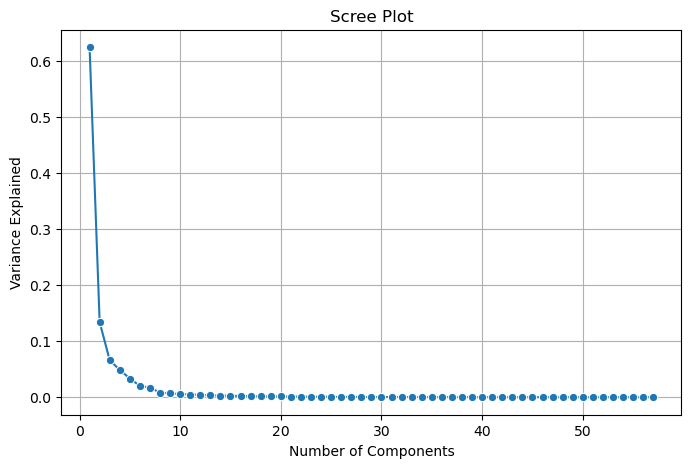

In [179]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [78]:
#Obtaining the Cumulative Sum of the Expalained Variance 

In [180]:
np.cumsum(pca.explained_variance_ratio_)

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264, 0.95902156, 0.96466793,
       0.96945356, 0.97358126, 0.97675877, 0.97972332, 0.98215096,
       0.98445448, 0.98627285, 0.98794626, 0.98945019, 0.99086751,
       0.99202391, 0.99312884, 0.99397446, 0.99477935, 0.99554613,
       0.9961055 , 0.99660681, 0.99708936, 0.99749984, 0.99788572,
       0.99821413, 0.99849265, 0.99873781, 0.99894611, 0.99914077,
       0.99929979, 0.99942681, 0.99953668, 0.99962348, 0.99970417,
       0.99976476, 0.99980302, 0.99984042, 0.99987407, 0.99989927,
       0.99991853, 0.99993544, 0.99995055, 0.99996197, 0.99997207,
       0.9999797 , 0.99998619, 0.99999156, 0.9999952 , 0.99999762,
       0.99999919, 1.        ])

In [79]:
# For 90% of the explained we need to select 5 PC's

In [181]:
DF_selected = DF_extracted[['PC1','PC2', 'PC3', 'PC4','PC5']]

In [182]:
DF_selected

PC1       PC2       PC3       PC4       PC5
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070
MARG_AL_0_3_F   0.056741  0.287541 -0.088097  0.240499 -0.036293
MARG_HH_0_3_M   0.119102  0.182341  0.026176 -0.240416  0.016981
MARG_HH_0_3_F   0.113044  0.177112  0.164774 -0.189408  0.047538
MARG_OT_0_3_M   0.142140  0.052925 -0.144419 -0.167554  0.014187
MARG_OT_0_3_F   0.141370  0.035109 -0.102175 -0.169020  0.047504
NON_WORK_M      0.147629 -0.049122 -0.126673  0.024036  0.191790
NON_WORK_F      0.142103 -0.039848 -0.028545  0.057402  0.249765

In [ ]:
#Check as to how the original features matter to each PC

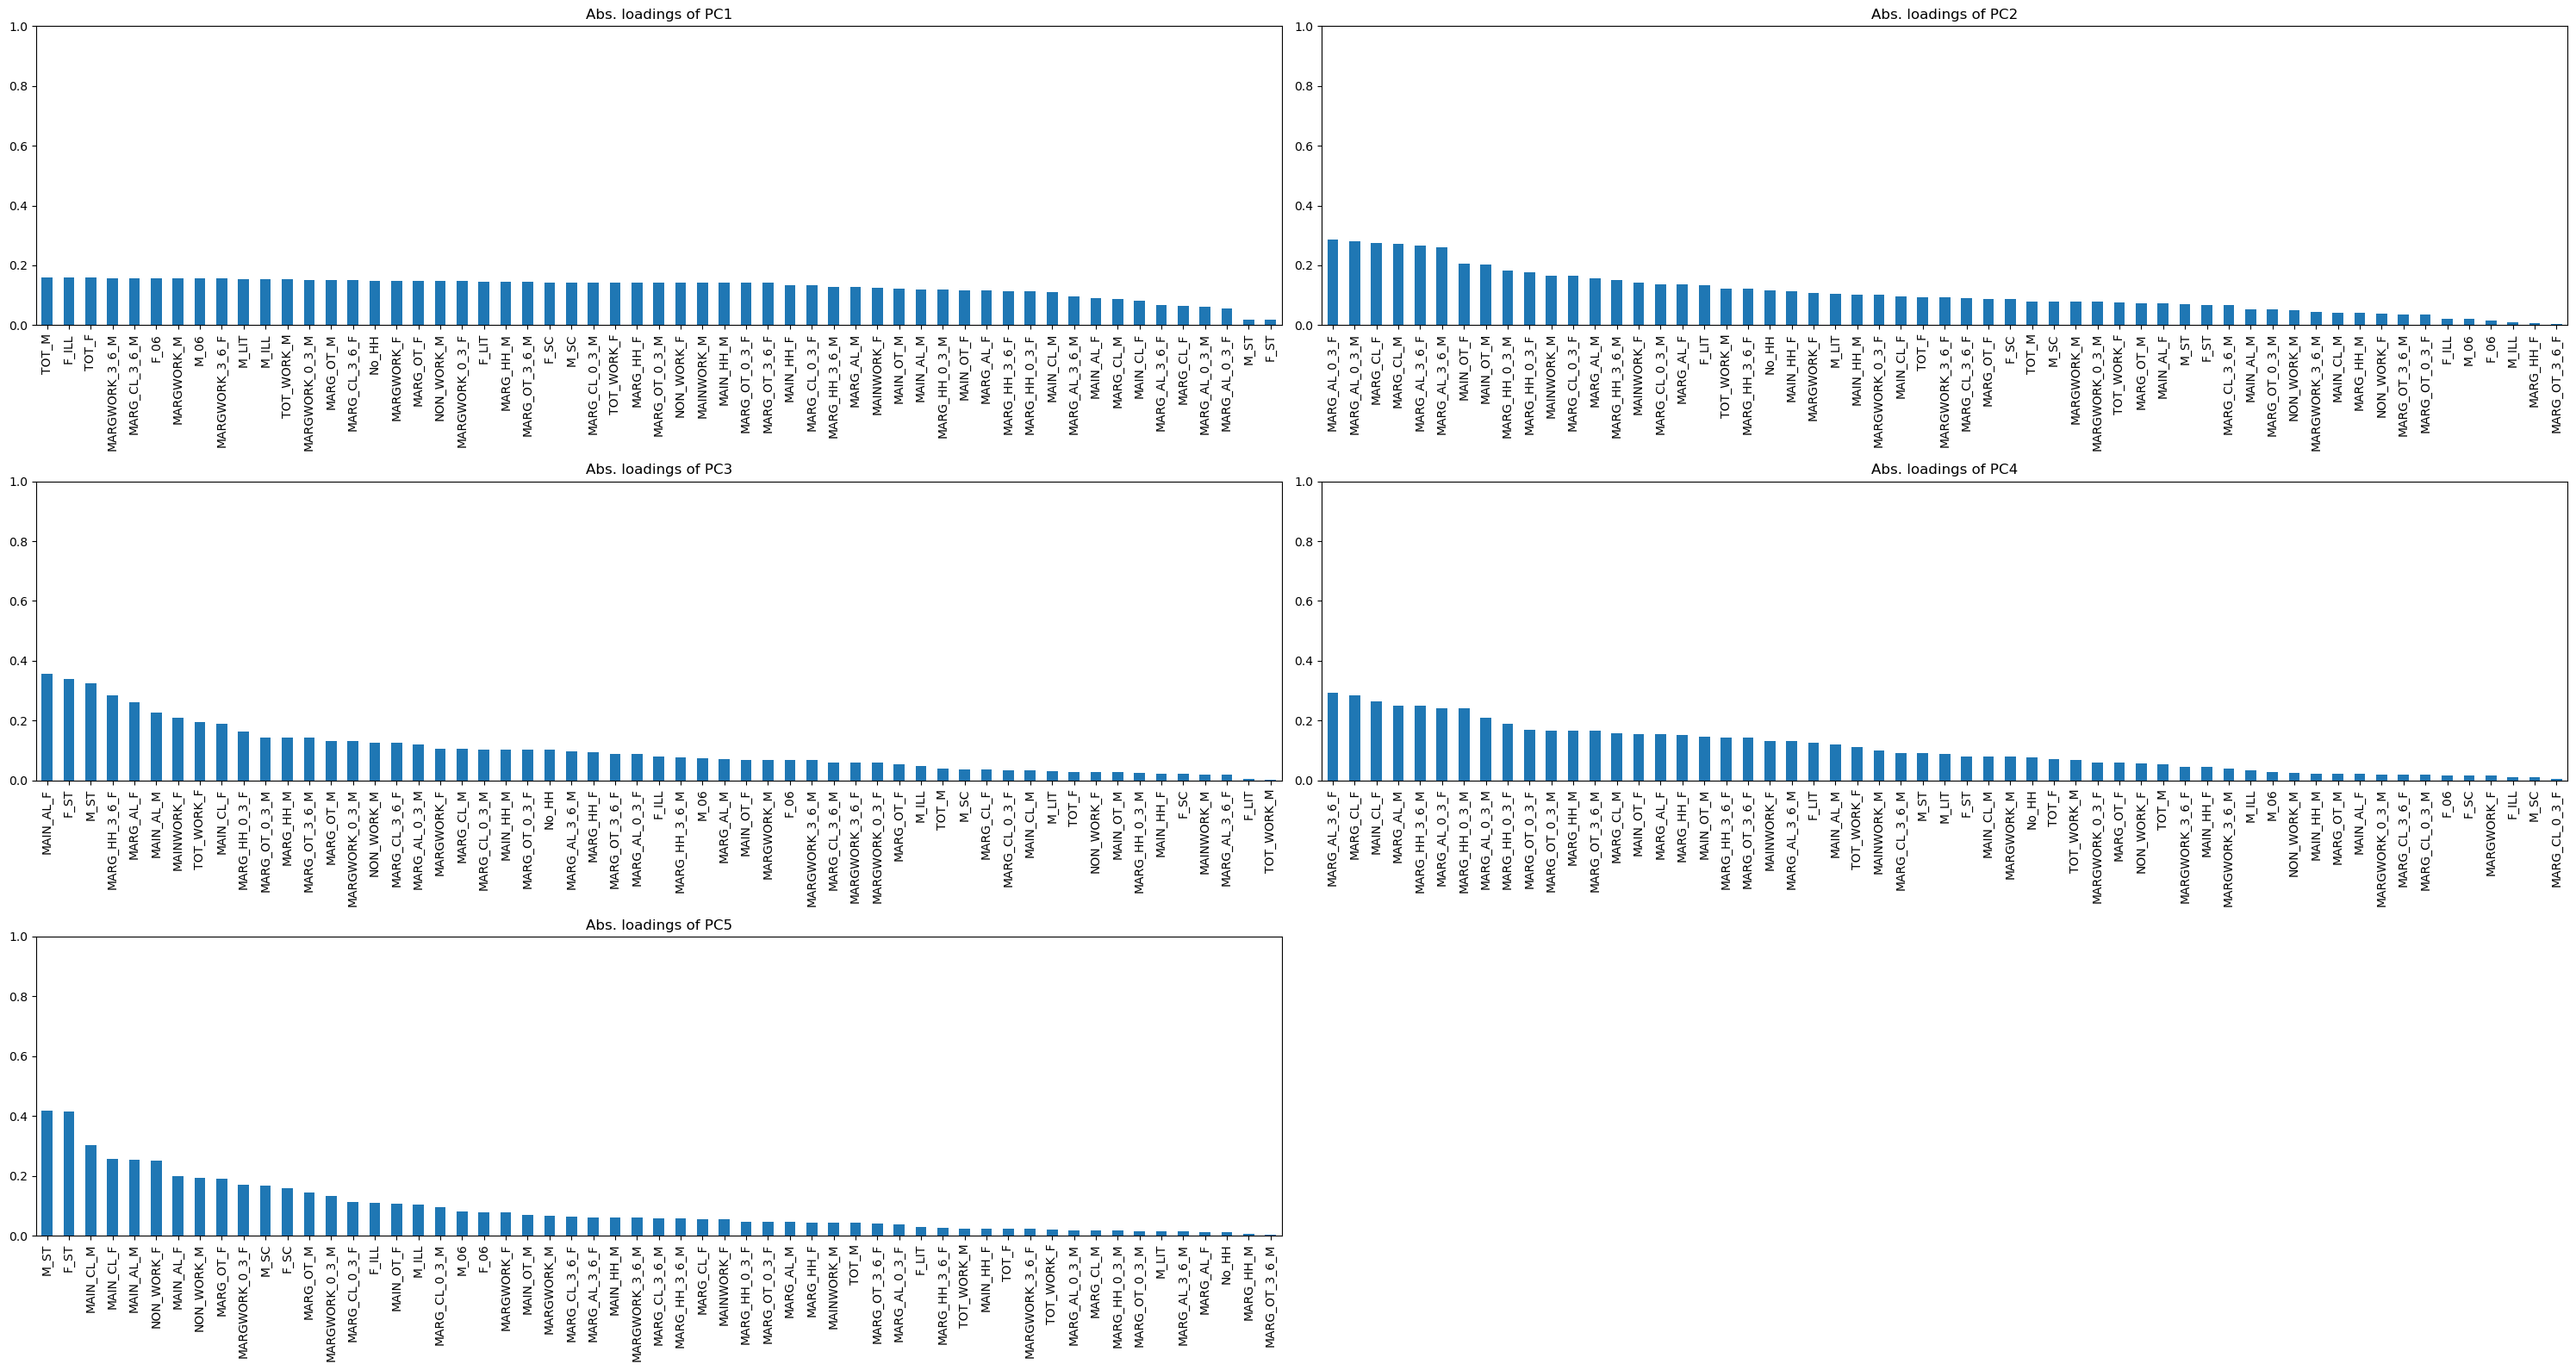

In [183]:
plt.figure(figsize = (30,16))
for i in range(len(DF_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(DF_selected[DF_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(DF_selected.columns[i]))
    plt.tight_layout()

In [ ]:
# Influence of variables on each PC's

### 2.27 Building PCA model with the 5 PC's

In [184]:
pca2 = PCA(n_components=5, random_state=123)
pca_final = pca2.fit_transform(DF_scaled)

In [185]:
pca2.components_

array([[ 0.14922158,  0.15916917,  0.15820921,  0.15634043,  0.1568144 ,
         0.14335015,  0.14353705,  0.01884873,  0.01787797,  0.15515239,
         0.14544984,  0.1545511 ,  0.15828347,  0.15407627,  0.14252995,
         0.14193201,  0.12573163,  0.11169244,  0.08303496,  0.11929067,
         0.09008881,  0.14184969,  0.13388011,  0.1227618 ,  0.1168656 ,
         0.15665637,  0.14869489,  0.08816344,  0.06516026,  0.1272781 ,
         0.11588826,  0.14536607,  0.14230182,  0.15087675,  0.14801846,
         0.15790761,  0.15583101,  0.15764021,  0.1495015 ,  0.0947852 ,
         0.06715842,  0.12818439,  0.11395923,  0.14510769,  0.14102942,
         0.15092232,  0.14753416,  0.14298675,  0.13378373,  0.06296394,
         0.05674058,  0.11910165,  0.11304417,  0.14213963,  0.14136961,
         0.14762899,  0.14210263],
       [-0.11548673, -0.08023879, -0.09371751, -0.02034061, -0.01431023,
        -0.07966701, -0.08709832,  0.06910144,  0.06731586, -0.10598636,
        -0.13323

### 2.28 Extracting factor loadings

In [186]:
#pca2.components_ is Eigen Vectors whose coefficients is called as loadings here
DF_pca_loading = pd.DataFrame(pca2.components_,columns=list(DF_scaled))
DF_pca_loading.shape

(5, 57)

In [187]:
DF_pca_loading.head(8)

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0  0.149222  0.159169  0.158209  0.156340  0.156814  0.143350  0.143537   
1 -0.115487 -0.080239 -0.093718 -0.020341 -0.014310 -0.079667 -0.087098   
2  0.101528 -0.038662  0.028959 -0.074419 -0.068223 -0.037619  0.021350   
3  0.076814  0.052976  0.070022  0.028520  0.016398  0.010210  0.016244   
4 -0.012090 -0.042344 -0.022927 -0.080339 -0.078326 -0.167893 -0.158092   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0  0.018849  0.017878  0.155152  ...       0.142987       0.133784   
1  0.069101  0.067316 -0.105986  ...       0.136839       0.166416   
2  0.323827  0.338705 -0.032107  ...      -0.103565       0.033423   
3  0.091143  0.079554  0.089187  ...      -0.018223       0.005954   
4  0.418412  0.415965 -0.014033  ...       0.094293       0.112351   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0       0.062964       0.056741       0.119102       0.113044       0.142140   
1       0.281881       0.287541       0.182341       0.177112       0.052925   
2      -0.120293      -0.088097       0.026176       0.164774      -0.144419   
3       0.208941       0.240499      -0.240416      -0.189408      -0.167554   
4      -0.018070      -0.036293       0.016981       0.047538       0.014187   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0       0.141370    0.147629    0.142103  
1       0.035109   -0.049122   -0.039848  
2      -0.102175   -0.126673   -0.028545  
3      -0.169020    0.024036    0.057402  
4       0.047504    0.191790    0.249765  

[5 rows x 57 columns]

In [188]:
DF_pca_loading.T

0         1         2         3         4
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070
MARG_AL_0_3_F   0.056741  0.287541 -0.088097  0.240499 -0.036293
MARG_HH_0_3_M   0.119102  0.182341  0.026176 -0.240416  0.016981
MARG_HH_0_3_F   0.113044  0.177112  0.164774 -0.189408  0.047538
MARG_OT_0_3_M   0.142140  0.052925 -0.144419 -0.167554  0.014187
MARG_OT_0_3_F   0.141370  0.035109 -0.102175 -0.169020  0.047504
NON_WORK_M      0.147629 -0.049122 -0.126673  0.024036  0.191790
NON_WORK_F      0.142103 -0.039848 -0.028545  0.057402  0.249765

In [189]:
DF_extracted_loadings1 = pd.DataFrame(pca2.components_.T, 
                                     columns = ['PC1 coeff','PC2 coeff', 'PC3 coeff', 'PC4 coeff', 'PC5 coeff'],
                                    index = DF_scaled.columns)

In [190]:
DF_extracted_loadings1

PC1 coeff  PC2 coeff  PC3 coeff  PC4 coeff  PC5 coeff
No_HH            0.149222  -0.115487   0.101528   0.076814  -0.012090
TOT_M            0.159169  -0.080239  -0.038662   0.052976  -0.042344
TOT_F            0.158209  -0.093718   0.028959   0.070022  -0.022927
M_06             0.156340  -0.020341  -0.074419   0.028520  -0.080339
F_06             0.156814  -0.014310  -0.068223   0.016398  -0.078326
M_SC             0.143350  -0.079667  -0.037619   0.010210  -0.167893
F_SC             0.143537  -0.087098   0.021350   0.016244  -0.158092
M_ST             0.018849   0.069101   0.323827   0.091143   0.418412
F_ST             0.017878   0.067316   0.338705   0.079554   0.415965
M_LIT            0.155152  -0.105986  -0.032107   0.089187  -0.014033
F_LIT            0.145450  -0.133234  -0.005133   0.125412   0.029084
M_ILL            0.154551  -0.009460  -0.047054  -0.034665  -0.104073
F_ILL            0.158283  -0.021793   0.079345  -0.010578  -0.110332
TOT_WORK_M       0.154076  -0.120912  -0.001116   0.069046  -0.023104
TOT_WORK_F       0.142530  -0.076003   0.194130   0.111057  -0.018931
MAINWORK_M       0.141932  -0.166700   0.019821   0.100188  -0.043225
MAINWORK_F       0.125732  -0.142250   0.209976   0.133013  -0.054674
MAIN_CL_M        0.111692   0.042552   0.033131   0.078851  -0.303376
MAIN_CL_F        0.083035   0.095893   0.188822   0.265022  -0.257925
MAIN_AL_M        0.119291  -0.053342   0.225831  -0.121379  -0.253131
MAIN_AL_F        0.090089  -0.072467   0.356566  -0.020989  -0.199220
MAIN_HH_M        0.141850  -0.101835  -0.102202  -0.021969  -0.060812
MAIN_HH_F        0.133880  -0.113257   0.021613  -0.045436  -0.023063
MAIN_OT_M        0.122762  -0.203602  -0.028144   0.147025   0.069907
MAIN_OT_F        0.116866  -0.205899   0.069034   0.155917   0.106774
MARGWORK_M       0.156656   0.079039  -0.068685  -0.078572   0.065812
MARGWORK_F       0.148695   0.108813   0.104957   0.015788   0.077624
MARG_CL_M        0.088163   0.271522  -0.104745   0.157104  -0.018005
MARG_CL_F        0.065160   0.275398  -0.036325   0.285024  -0.055152
MARG_AL_M        0.127278   0.156579   0.070434  -0.250594  -0.047200
MARG_AL_F        0.115888   0.135048   0.259987  -0.153798  -0.012643
MARG_HH_M        0.145366   0.040974  -0.144347  -0.167540   0.005575
MARG_HH_F        0.142302   0.006685  -0.093838  -0.151469   0.043616
MARG_OT_M        0.150877  -0.073440  -0.131415   0.021195   0.145109
MARG_OT_F        0.148018  -0.088361  -0.053883   0.059961   0.190756
MARGWORK_3_6_M   0.157908  -0.044044  -0.066877   0.039319  -0.059886
MARGWORK_3_6_F   0.155831  -0.092383  -0.058718   0.046130  -0.022476
MARG_CL_3_6_M    0.157640   0.066208  -0.060172  -0.091315   0.059078
MARG_CL_3_6_F    0.149501   0.089651   0.125792   0.018865   0.064349
MARG_AL_3_6_M    0.094785   0.261268  -0.096551   0.131591  -0.013887
MARG_AL_3_6_F    0.067158   0.266691  -0.018256   0.292845  -0.061019
MARG_HH_3_6_M    0.128184   0.149831   0.078194  -0.250337  -0.058665
MARG_HH_3_6_F    0.113959   0.120648   0.283235  -0.143045  -0.025386
MARG_OT_3_6_M    0.145108   0.036763  -0.142511  -0.166002   0.003315
MARG_OT_3_6_F    0.141029  -0.003685  -0.089356  -0.142599   0.041678
MARGWORK_0_3_M   0.150922  -0.077739  -0.130687   0.019887   0.132794
MARGWORK_0_3_F   0.147534  -0.101141  -0.058489   0.060087   0.170596
MARG_CL_0_3_M    0.142987   0.136839  -0.103565  -0.018223   0.094293
MARG_CL_0_3_F    0.133784   0.166416   0.033423   0.005954   0.112351
MARG_AL_0_3_M    0.062964   0.281881  -0.120293   0.208941  -0.018070
MARG_AL_0_3_F    0.056741   0.287541  -0.088097   0.240499  -0.036293
MARG_HH_0_3_M    0.119102   0.182341   0.026176  -0.240416   0.016981
MARG_HH_0_3_F    0.113044   0.177112   0.164774  -0.189408   0.047538
MARG_OT_0_3_M    0.142140   0.052925  -0.144419  -0.167554   0.014187
MARG_OT_0_3_F    0.141370   0.035109  -0.102175  -0.169020   0.047504
NON_WORK_M       0.147629  -0.049122  -0.126673   0.024036   0.191790
NON_WORK_F       0.142103 

### 2.29 Identifying the actual columns wirh most variance 

In [191]:
from matplotlib.patches import Rectangle

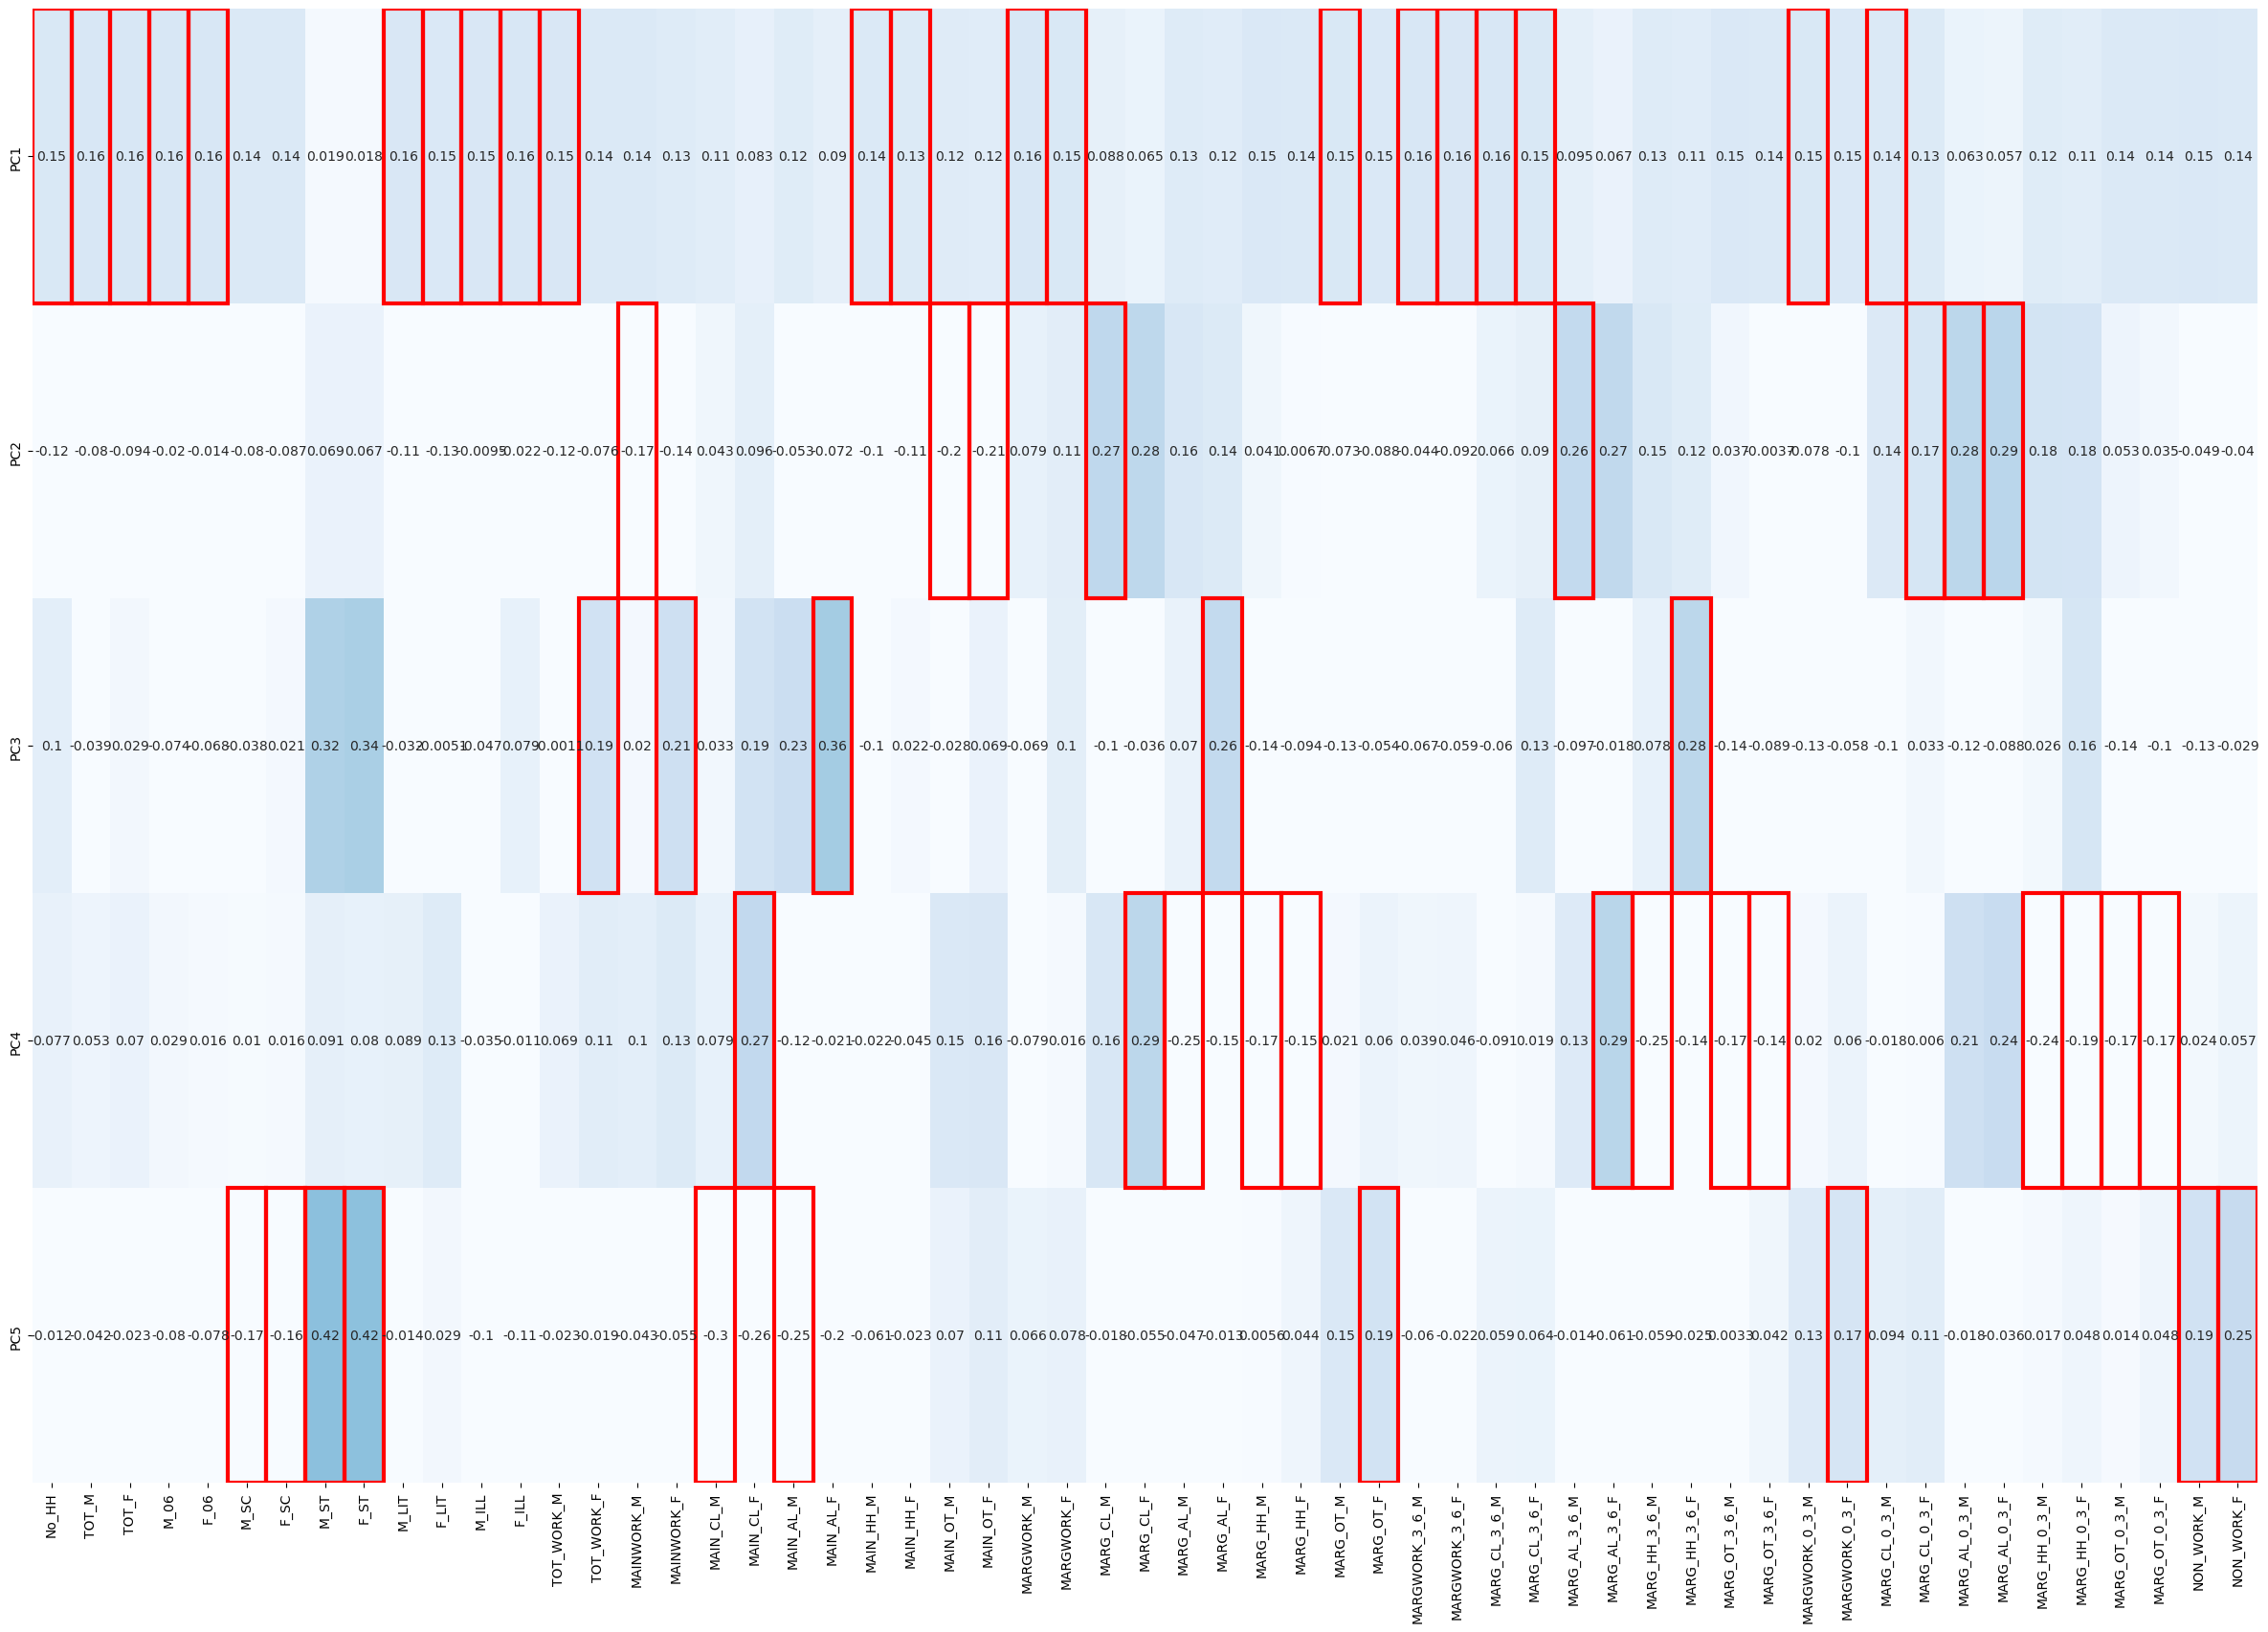

In [196]:
fig,ax = plt.subplots(figsize=(30,20), facecolor='w', edgecolor='k')

ax = sns.heatmap(DF_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2', 'PC3', 'PC4','PC5'])
column_max = DF_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(DF_pca_loading.columns):
    position = DF_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [213]:
pca_final_DF = pd.DataFrame(pca_final, columns = DF_selected.columns)
pca_final_DF.head(10)

PC1       PC2       PC3       PC4       PC5
0 -5.528161  0.430378 -1.473827 -1.278049  0.376358
1 -5.492016 -0.106110 -2.015641 -1.750168 -0.006857
2 -7.474643 -0.217194 -0.247428  0.006079  0.556282
3 -7.919737 -0.652311 -0.659220 -0.735550  0.272465
4 -5.175695  2.304059 -1.157327  1.060796  1.080249
5 -3.647563  4.598733 -1.742810  3.301079  1.212639
6 -6.178820 -0.256962 -1.234310 -0.121392 -0.173580
7 -5.436802  0.237215 -1.664352 -1.163284  0.220704
8 -6.099449  0.004985 -1.563508 -1.537818  0.364566
9 -4.972562 -1.970847 -1.707058 -0.676605  0.614131

### 2.30 Checking the presence of correlations among the PCs

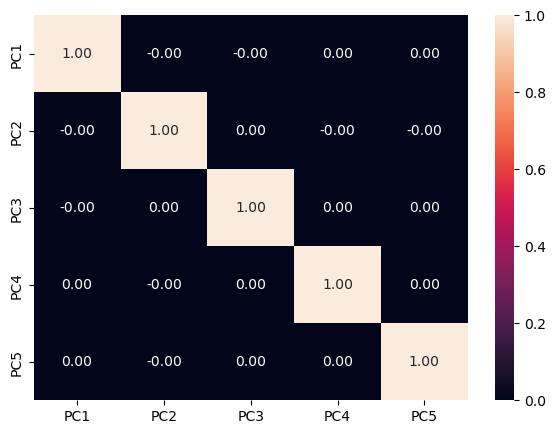

In [214]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (7,5))
sns.heatmap(pca_final_DF.corr(), annot=True,fmt='.2f');

In [215]:
pca_final

array([[-5.52816148e+00,  4.30377559e-01, -1.47382695e+00,
        -1.27804898e+00,  3.76357641e-01],
       [-5.49201646e+00, -1.06110331e-01, -2.01564100e+00,
        -1.75016759e+00, -6.85689225e-03],
       [-7.47464297e+00, -2.17193764e-01, -2.47428211e-01,
         6.07916548e-03,  5.56282180e-01],
       ...,
       [-7.88626804e+00, -1.00353656e+00, -9.09284569e-01,
        -1.23800927e+00,  1.46031242e-01],
       [-7.86425952e+00, -9.99337996e-01, -8.51569237e-01,
        -7.82561039e-01, -8.16813905e-02],
       [-7.41622568e+00, -1.41214300e+00, -8.65921210e-01,
        -6.80528005e-01,  9.68605787e-02]])

In [216]:
pca_final.shape

(640, 5)

### 2.31 Identifiying the actual variables 

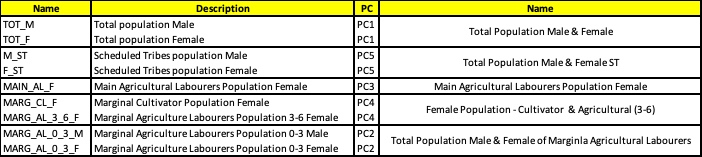

In [217]:
DF_pca_final = pd.DataFrame(pca_final,columns=['pc_total_male_female','pc_total_male-female_marginal_agricultural_labourers',
                                               'pc_main_agricultural_labourers_female_population',
                                  'pc_female_population_cultivator_agricultural_3-6','pc_total_st_male_female'])
DF_pca_final.head()

pc_total_male_female  pc_total_male-female_marginal_agricultural_labourers  \
0             -5.528161                                           0.430378      
1             -5.492016                                          -0.106110      
2             -7.474643                                          -0.217194      
3             -7.919737                                          -0.652311      
4             -5.175695                                           2.304059      

   pc_main_agricultural_labourers_female_population  \
0                                         -1.473827   
1                                         -2.015641   
2                                         -0.247428   
3                                         -0.659220   
4                                         -1.157327   

   pc_female_population_cultivator_agricultural_3-6  pc_total_st_male_female  
0                                         -1.278049                 0.376358  
1                                         -1.750168                -0.006857  
2                                          0.006079                 0.556282  
3                                         -0.735550                 0.272465  
4                                          1.060796                 1.080249

In [218]:
DF_pca_final.shape

(640, 5)

### 2.32 EDA (Categorical Fields & Principal Components)


In [ ]:
DF_Copy2_cat

In [222]:
DF_New = pd.concat([DF_Copy2_cat, DF_pca_final], axis=1)

In [223]:
DF_New.head()

State    Area Name  pc_total_male_female  \
0  Jammu & Kashmir      Kupwara             -5.528161   
1  Jammu & Kashmir       Badgam             -5.492016   
2  Jammu & Kashmir  Leh(Ladakh)             -7.474643   
3  Jammu & Kashmir       Kargil             -7.919737   
4  Jammu & Kashmir        Punch             -5.175695   

   pc_total_male-female_marginal_agricultural_labourers  \
0                                           0.430378      
1                                          -0.106110      
2                                          -0.217194      
3                                          -0.652311      
4                                           2.304059      

   pc_main_agricultural_labourers_female_population  \
0                                         -1.473827   
1                                         -2.015641   
2                                         -0.247428   
3                                         -0.659220   
4                                         -1.157327   

   pc_female_population_cultivator_agricultural_3-6  pc_total_st_male_female  
0                                         -1.278049                 0.376358  
1                                         -1.750168                -0.006857  
2                                          0.006079                 0.556282  
3                                         -0.735550                 0.272465  
4                                          1.060796                 1.080249

### 2.33 Inferences

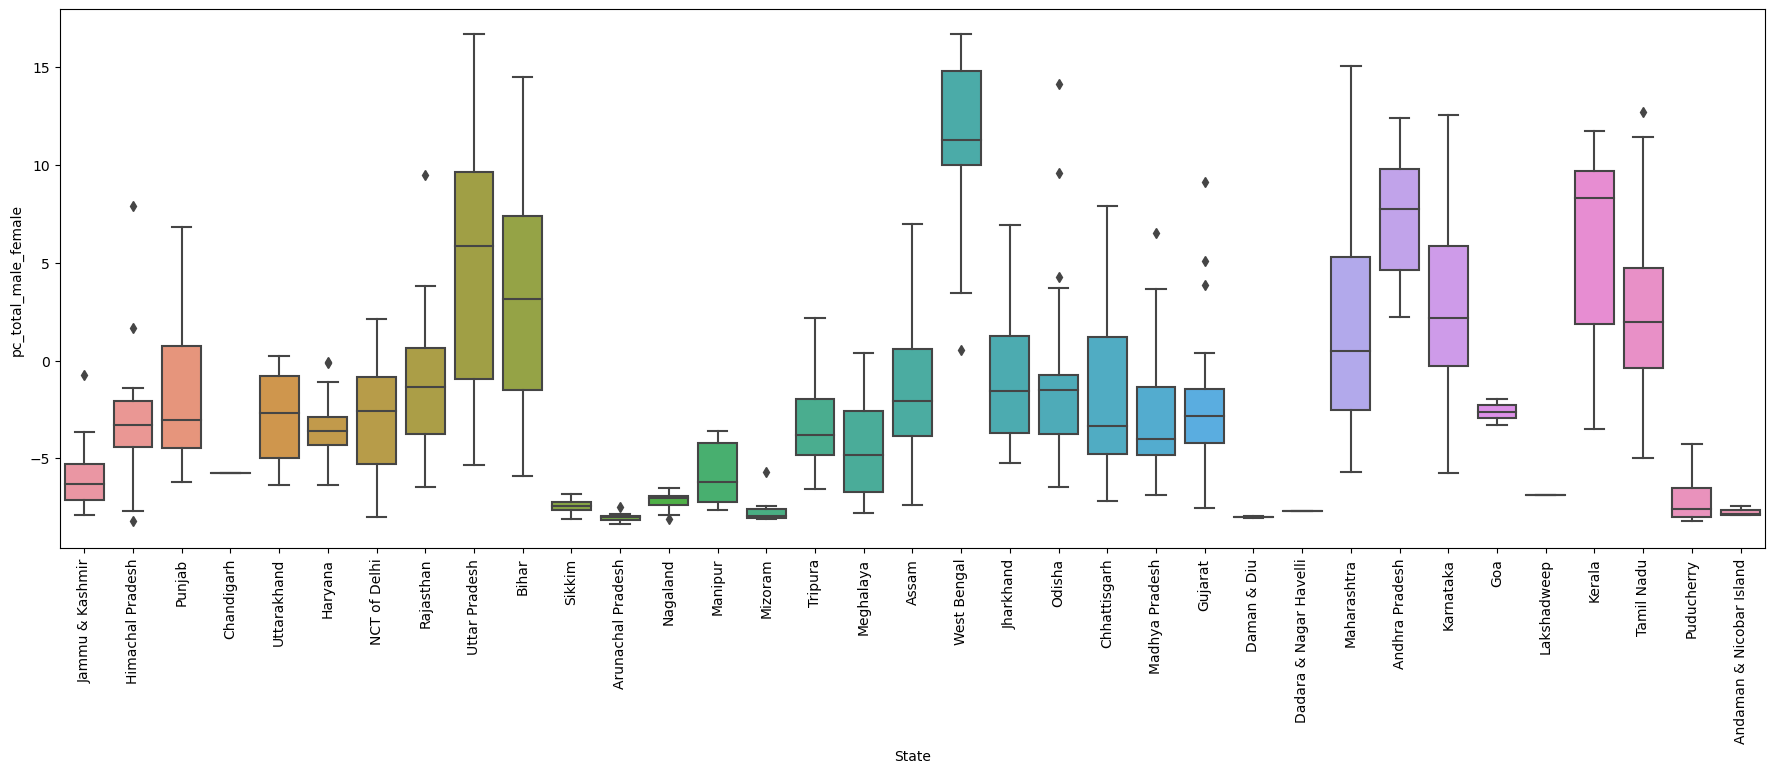

In [227]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_total_male_female', data=DF_New)
plt.xticks(rotation=90);

In [ ]:
# Westbengal has the highest avgerage male & female total
# Daman & Diu has the lowest avgerage male & female total

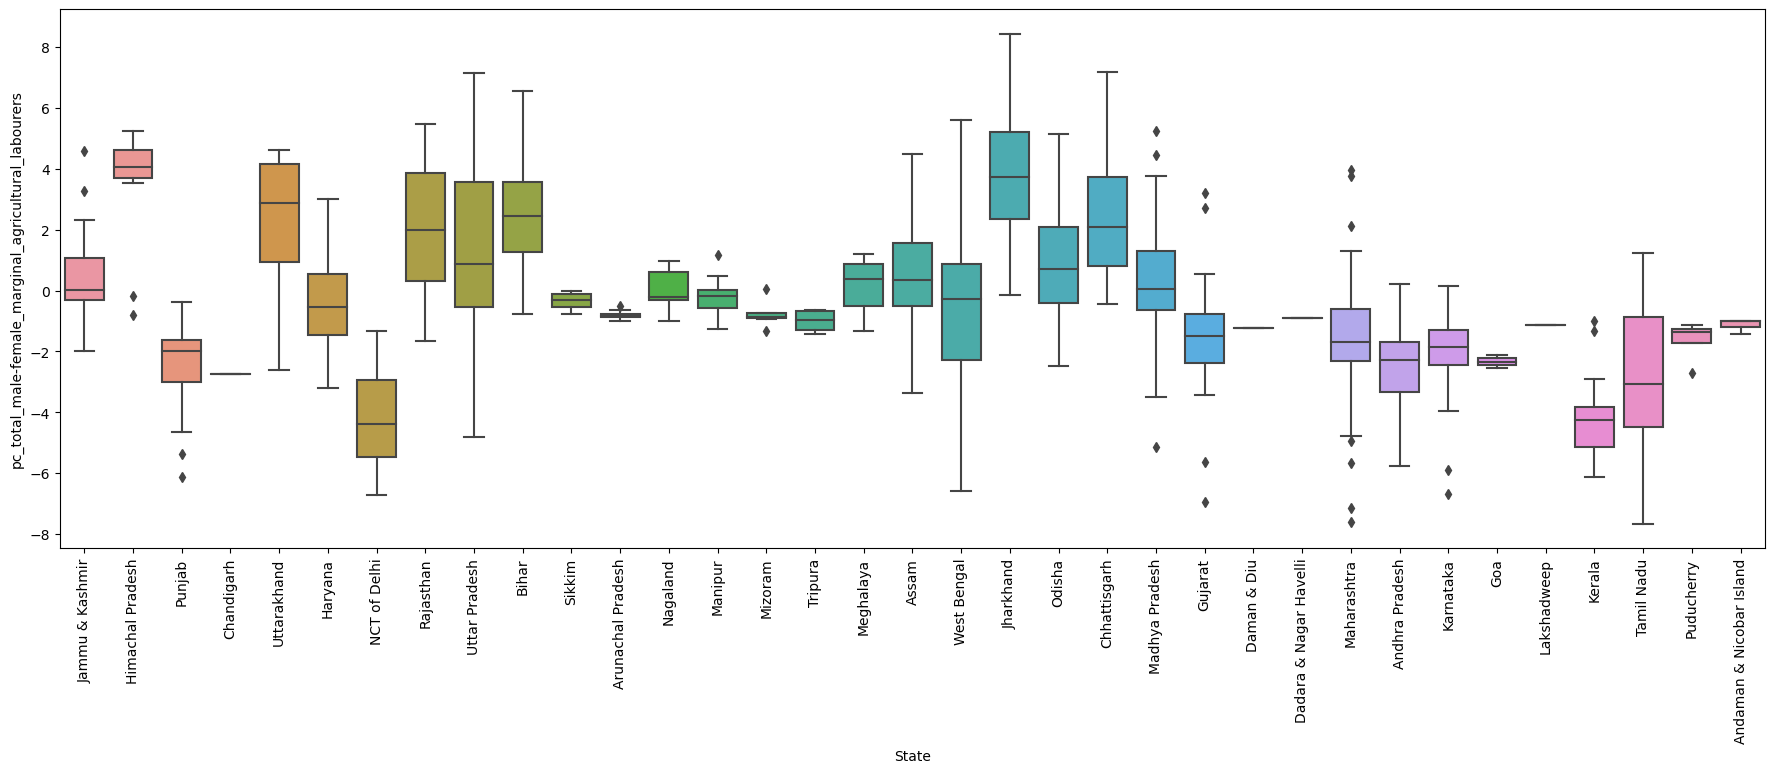

In [233]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_total_male-female_marginal_agricultural_labourers', data=DF_New)
plt.xticks(rotation=90);

In [ ]:
# Himachal pradesh has the highest average of total male & female population of marginal agricultural labourers
# Kerala & NCT of Delhi has the lowest average of total male & female population of marginal agricultural labourers

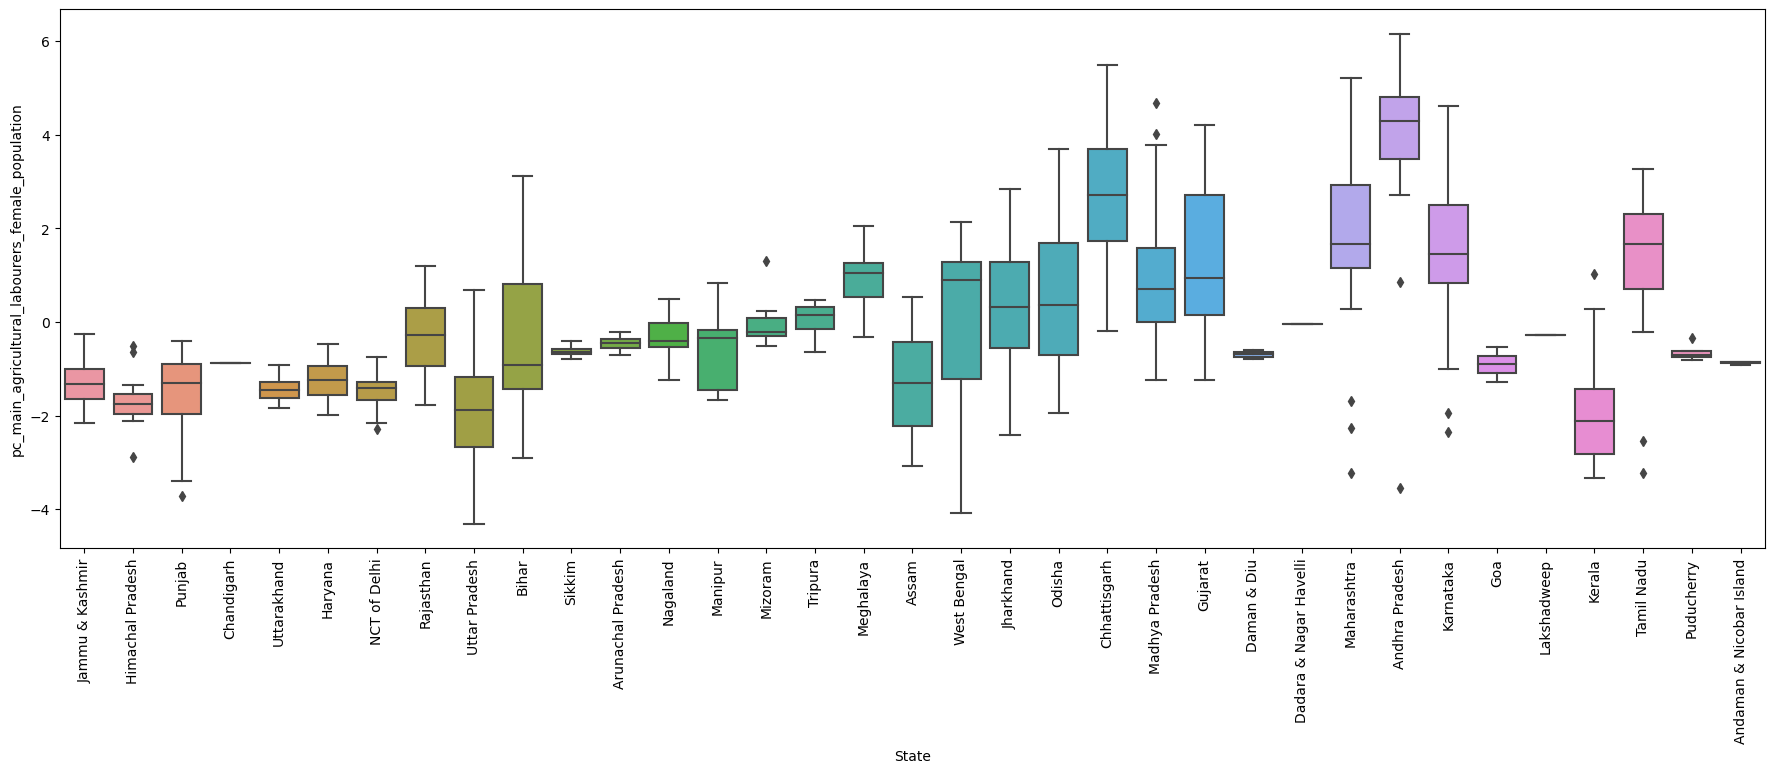

In [229]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_main_agricultural_labourers_female_population', data=DF_New)
plt.xticks(rotation=90);

In [ ]:
# Andra pradesh has the highest average female population of agricultural labourers
# Kerala has the lowest average female population of agricultural labourers

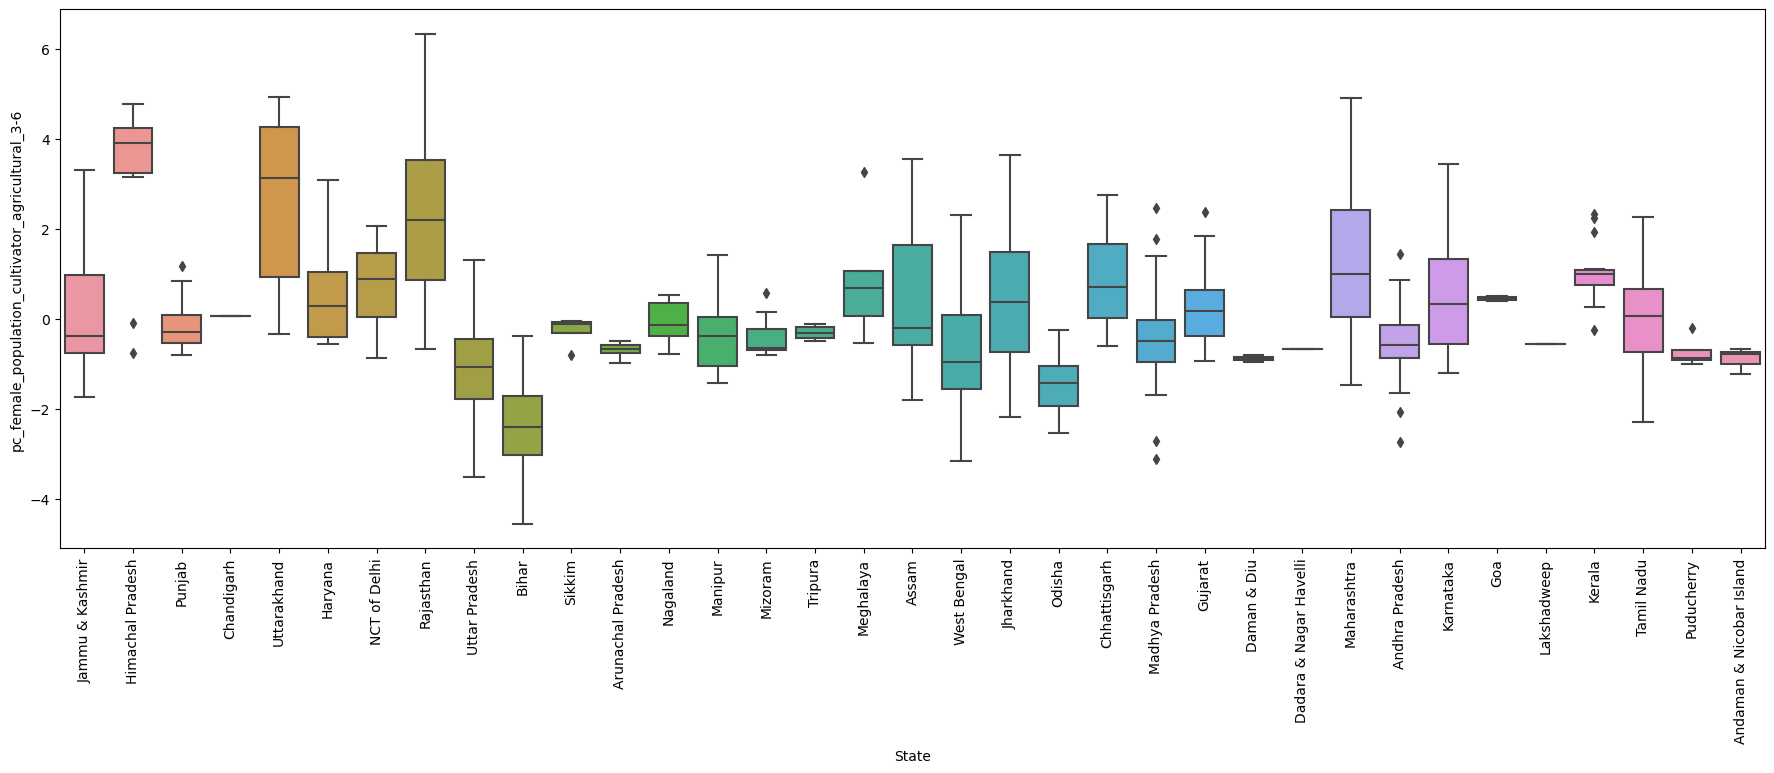

In [230]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_female_population_cultivator_agricultural_3-6', data=DF_New)
plt.xticks(rotation=90);

In [ ]:
# Himachel pradesh has the highest average female population of Cultivator & agricultural labourers of age 3-6
# Bihar has the lowest average female population of Cultivator & agricultural labourers of age 3-6

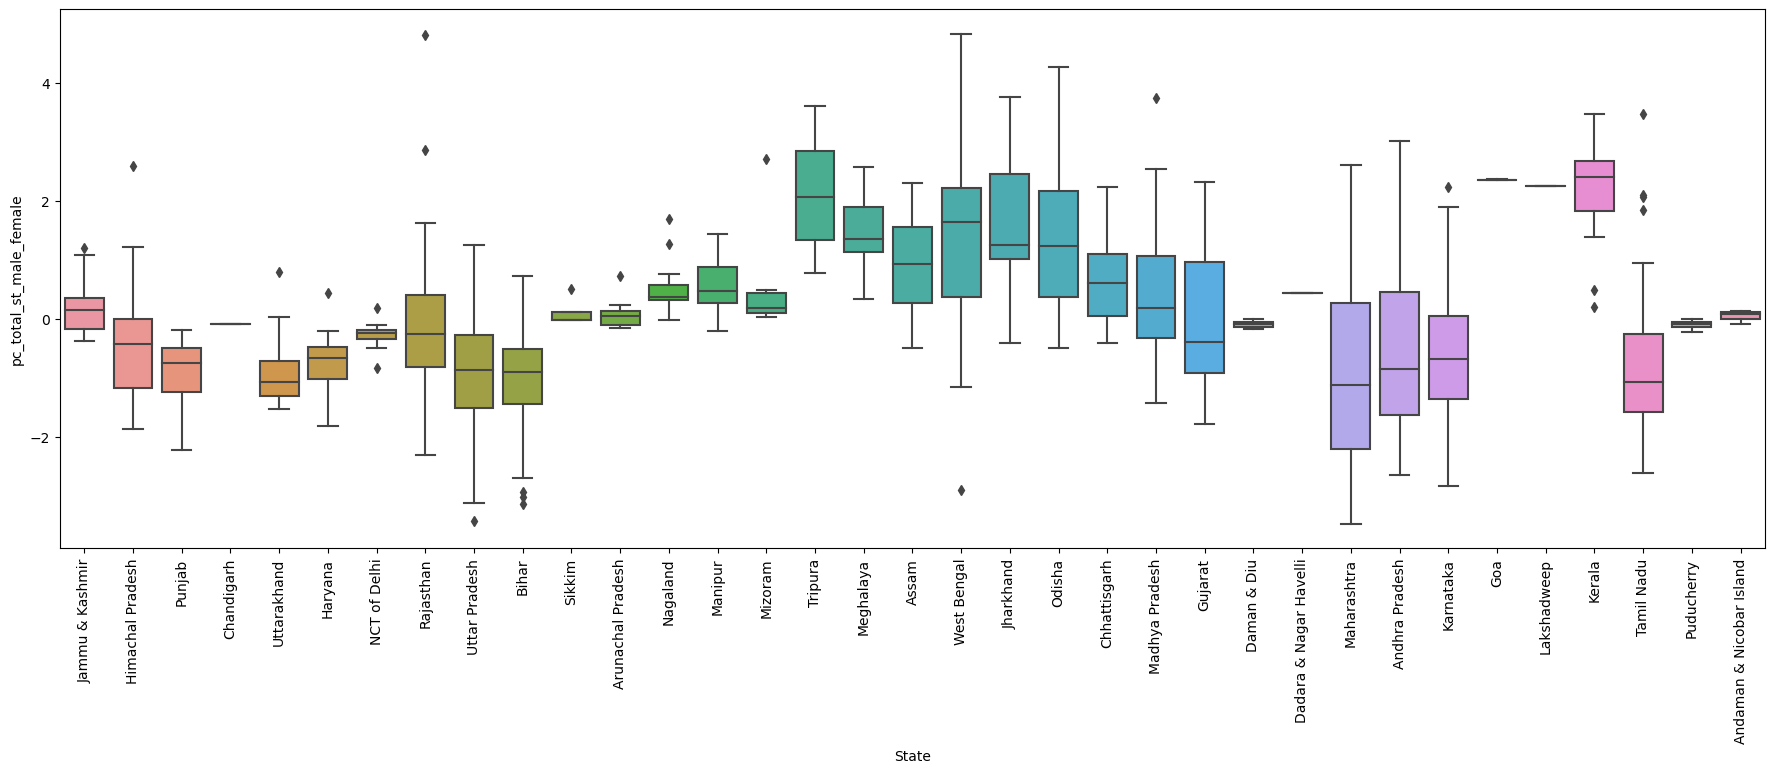

In [231]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_total_st_male_female', data=DF_New)
plt.xticks(rotation=90);

In [ ]:
# Kerala has the highest average Total male & female Scheduled Tribe population
# Uttarakhand has the lowest average Total male & female Scheduled Tribe population

### The Linear eg of 1st component

In [93]:

for i in range(0, df_scaled.shape[1]):
    print('{} * {}'.format (np.round (pca2.components_[0][i],3), df_scaled.columns [i]), end=' + ')

0.149 * No_HH + 0.159 * TOT_M + 0.158 * TOT_F + 0.156 * M_06 + 0.157 * F_06 + 0.143 * M_SC + 0.144 * F_SC + 0.019 * M_ST + 0.018 * F_ST + 0.155 * M_LIT + 0.145 * F_LIT + 0.155 * M_ILL + 0.158 * F_ILL + 0.154 * TOT_WORK_M + 0.143 * TOT_WORK_F + 0.142 * MAINWORK_M + 0.126 * MAINWORK_F + 0.112 * MAIN_CL_M + 0.083 * MAIN_CL_F + 0.119 * MAIN_AL_M + 0.09 * MAIN_AL_F + 0.142 * MAIN_HH_M + 0.134 * MAIN_HH_F + 0.123 * MAIN_OT_M + 0.117 * MAIN_OT_F + 0.157 * MARGWORK_M + 0.149 * MARGWORK_F + 0.088 * MARG_CL_M + 0.065 * MARG_CL_F + 0.127 * MARG_AL_M + 0.116 * MARG_AL_F + 0.145 * MARG_HH_M + 0.142 * MARG_HH_F + 0.151 * MARG_OT_M + 0.148 * MARG_OT_F + 0.158 * MARGWORK_3_6_M + 0.156 * MARGWORK_3_6_F + 0.158 * MARG_CL_3_6_M + 0.15 * MARG_CL_3_6_F + 0.095 * MARG_AL_3_6_M + 0.067 * MARG_AL_3_6_F + 0.128 * MARG_HH_3_6_M + 0.114 * MARG_HH_3_6_F + 0.145 * MARG_OT_3_6_M + 0.141 * MARG_OT_3_6_F + 0.151 * MARGWORK_0_3_M + 0.148 * MARGWORK_0_3_F + 0.143 * MARG_CL_0_3_M + 0.134 * MARG_CL_0_3_F + 0.063 * MARG_A